In [3]:
import pandas as pd 
import numpy as np 

In [4]:
import os

# Path to the folder containing the CSVs
folder_path = 'stock_data'

# Dictionary to hold DataFrames for each stock
stock_data = {}

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Full path of the file
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV into a DataFrame
        stock_name = filename.replace('.csv', '')  # Extract stock name (without .csv)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary
        stock_data[stock_name] = df
        
        # Optional: print the first few rows of the DataFrame
        print(f"Loaded {stock_name}:")
        print(df.head(10))
        print("\n")



Loaded ASIANPAINT:
    timestamp       open       high        low      close  volume
0  2025-05-07  2370.7500  2405.0000  2319.0500  2332.6499   49937
1  2025-05-06  2440.1001  2446.9500  2390.5000  2417.9500   44538
2  2025-05-05  2421.4500  2474.5000  2421.4500  2437.3000   23800
3  2025-05-02  2420.6499  2445.1499  2398.2500  2409.4500   71905
4  2025-04-30  2440.5500  2461.4500  2401.0000  2423.3000   55057
5  2025-04-29  2455.5000  2471.8000  2439.3501  2452.0000   57466
6  2025-04-28  2411.2000  2459.6001  2406.0000  2452.5500   24180
7  2025-04-25  2460.1001  2469.3999  2413.5000  2430.2000   82859
8  2025-04-24  2441.1499  2490.7000  2436.2000  2464.6001   38991
9  2025-04-23  2434.4500  2455.9500  2426.6001  2453.0000   54412


Loaded BHARTIARTL:
    timestamp     open     high     low    close  volume
0  2025-05-07  1900.00  1916.90  1875.0  1895.95  119949
1  2025-05-06  1881.00  1912.00  1881.0  1901.15  225743
2  2025-05-05  1860.35  1873.35  1849.4  1865.45  124797
3  202

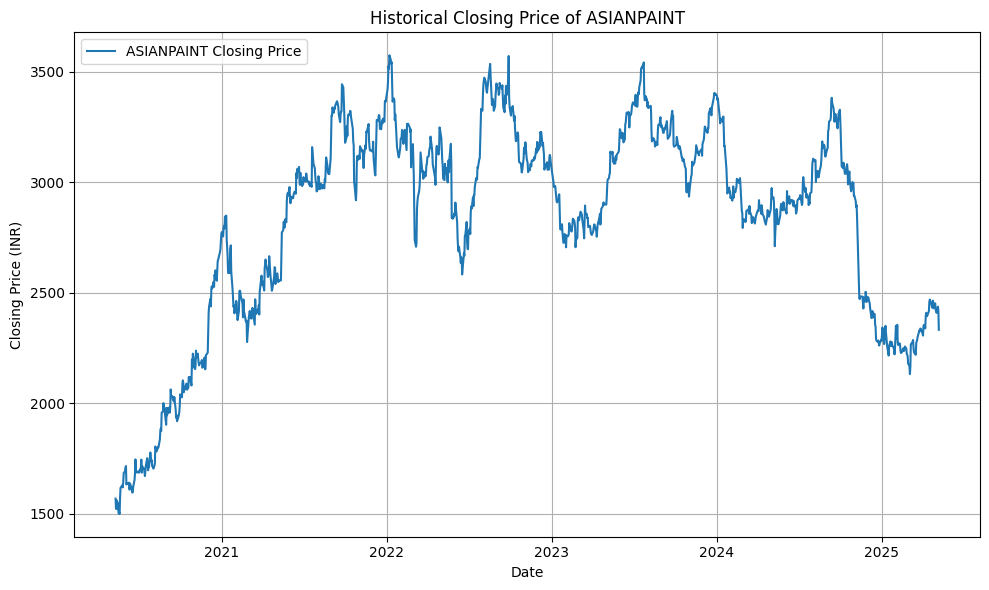

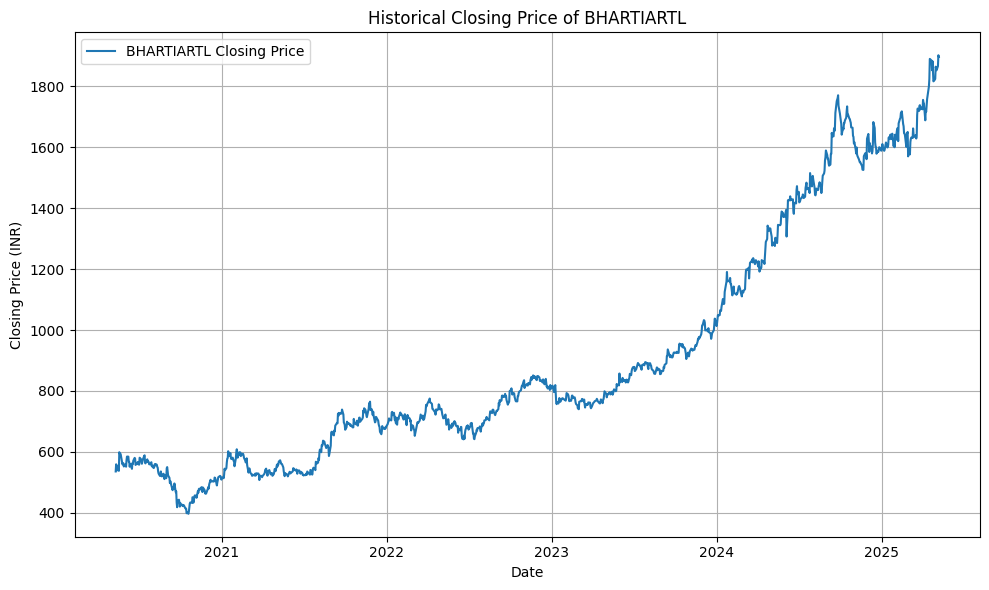

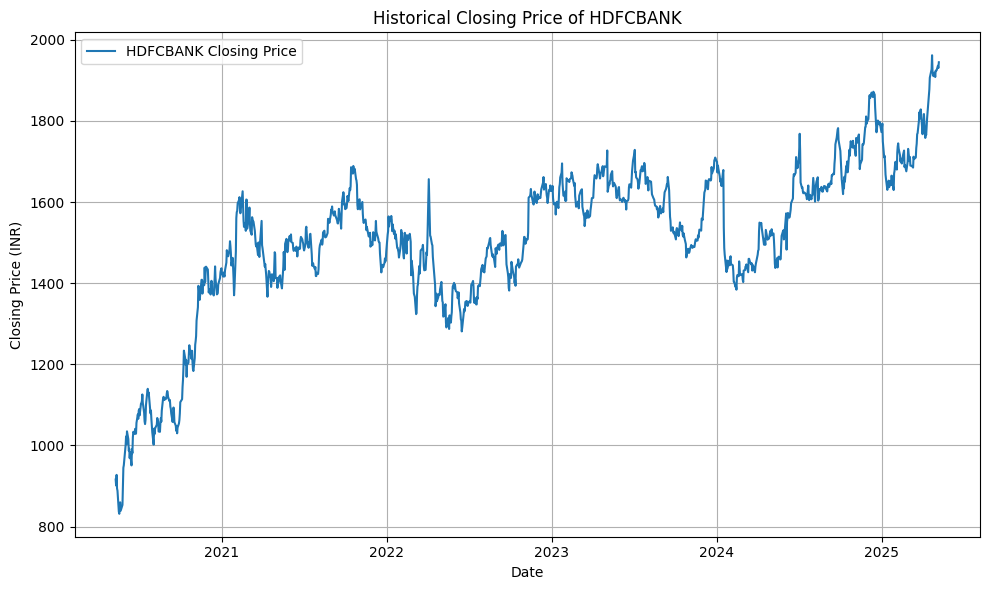

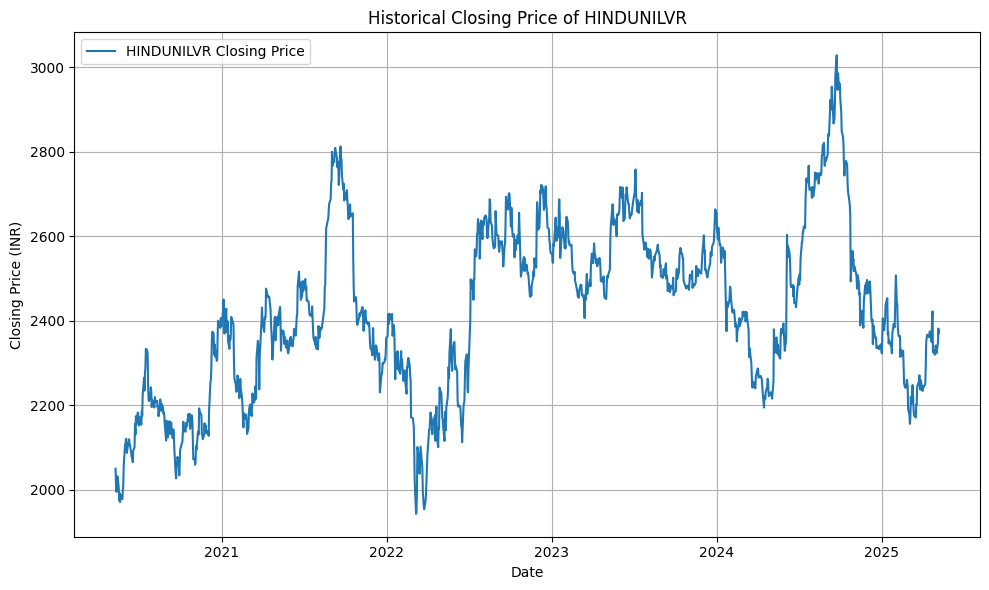

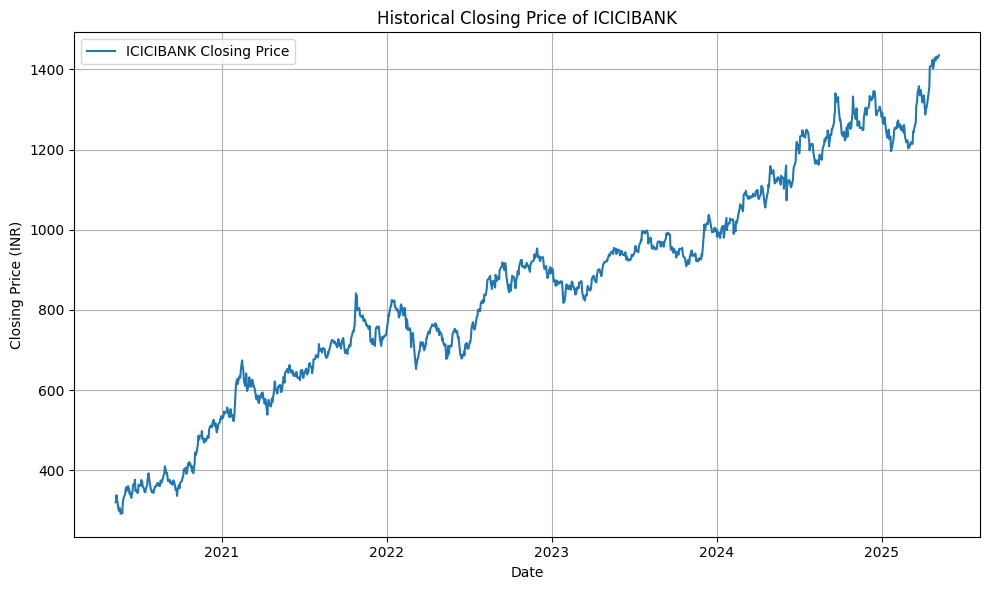

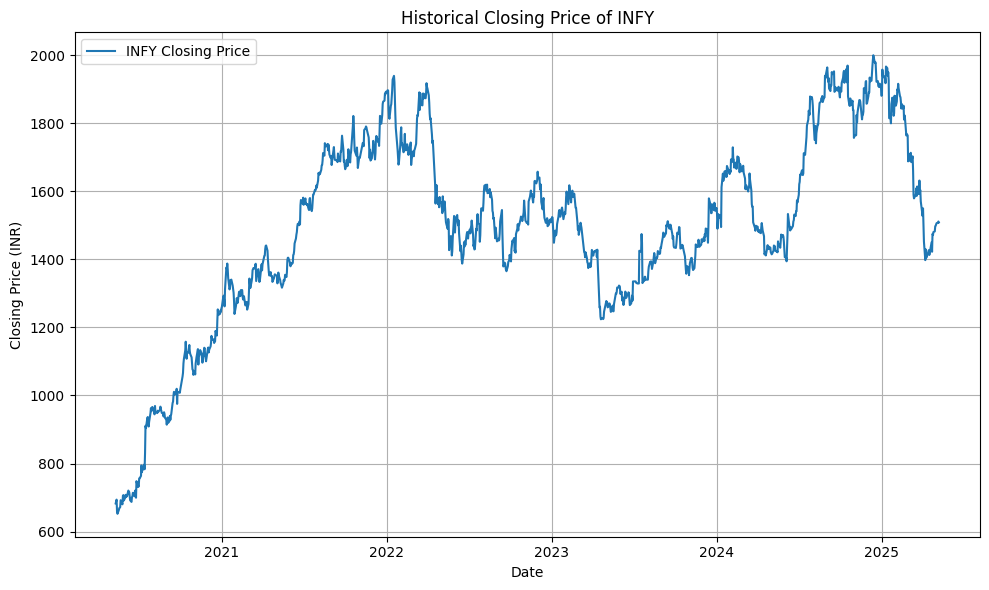

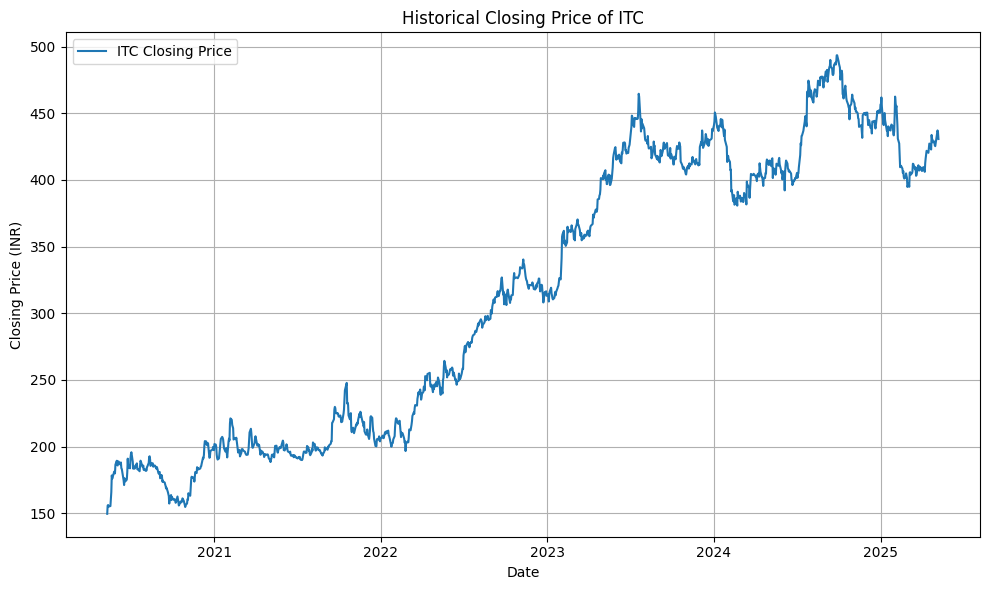

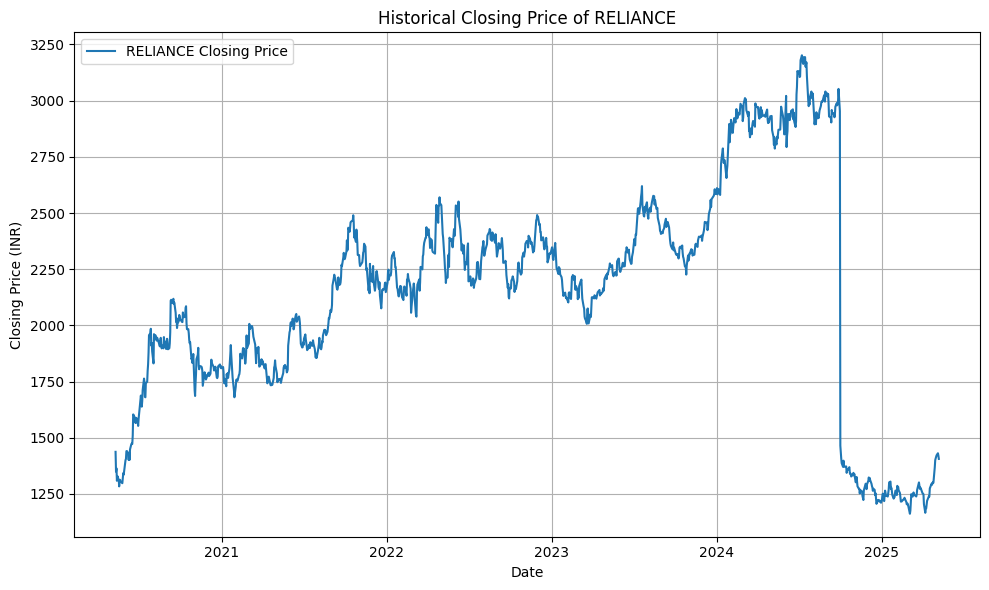

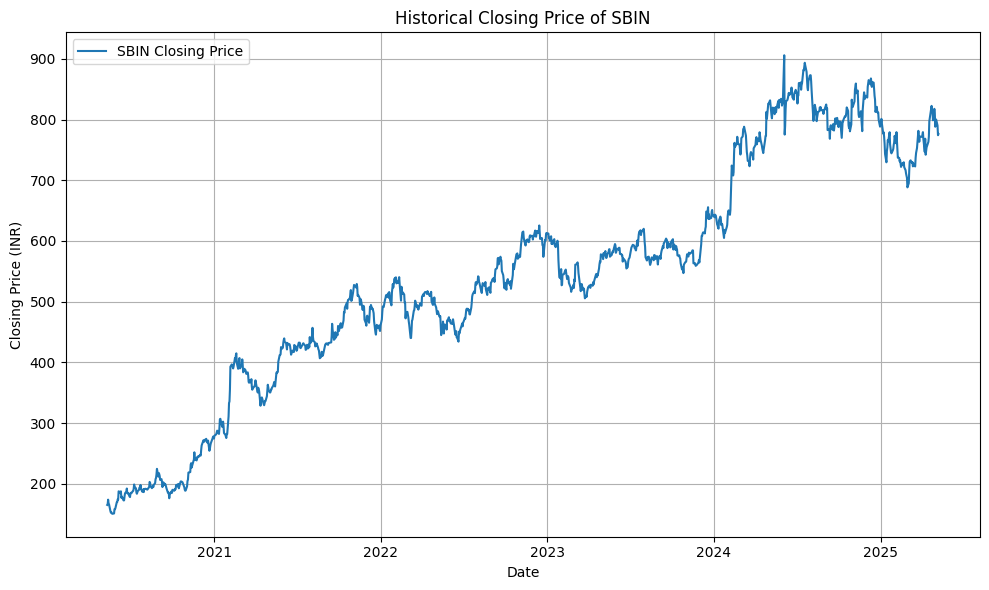

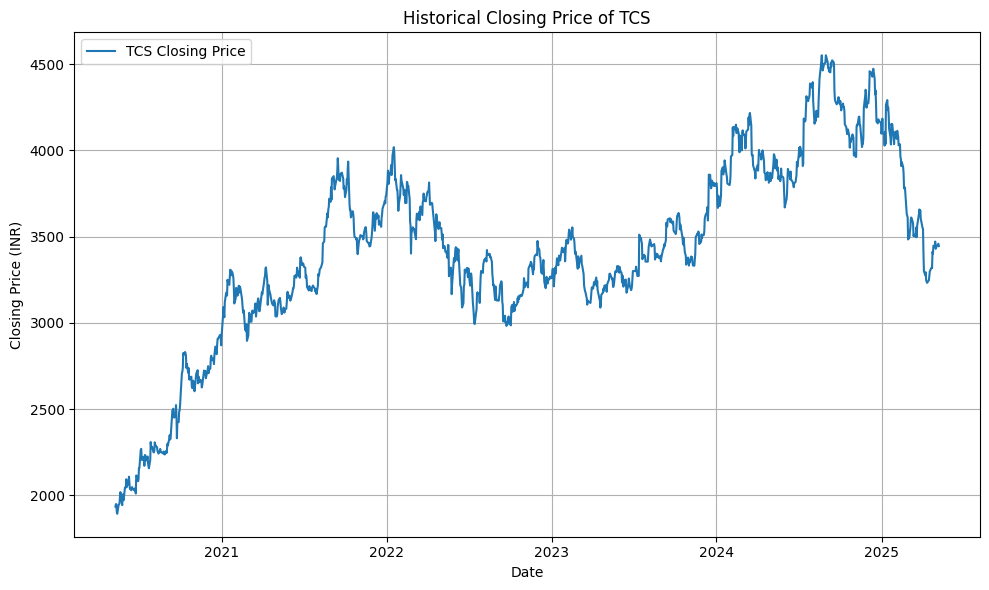

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to your stock CSVs
folder_path = 'stock_data'

# Load all CSVs into a dictionary
stock_data = {}
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        stock_name = filename.replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, parse_dates=['timestamp'])  # Ensure timestamp is parsed
        df.sort_values('timestamp', inplace=True)  # Ensure chronological order
        stock_data[stock_name] = df

# Plot each stock's closing price
for stock_name, df in stock_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label=f'{stock_name} Closing Price', linewidth=1.5)
    plt.title(f'Historical Closing Price of {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (INR)')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

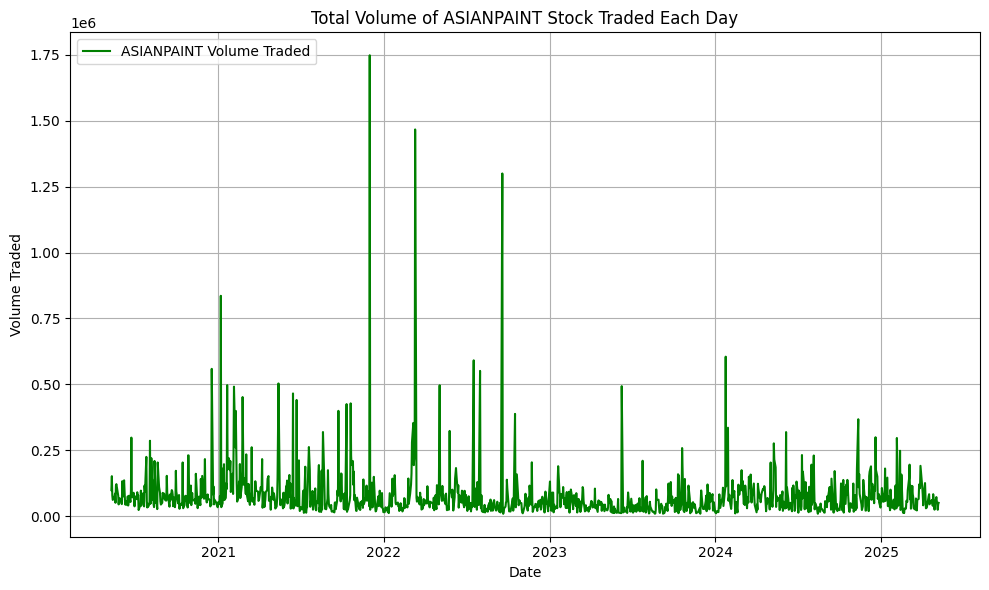

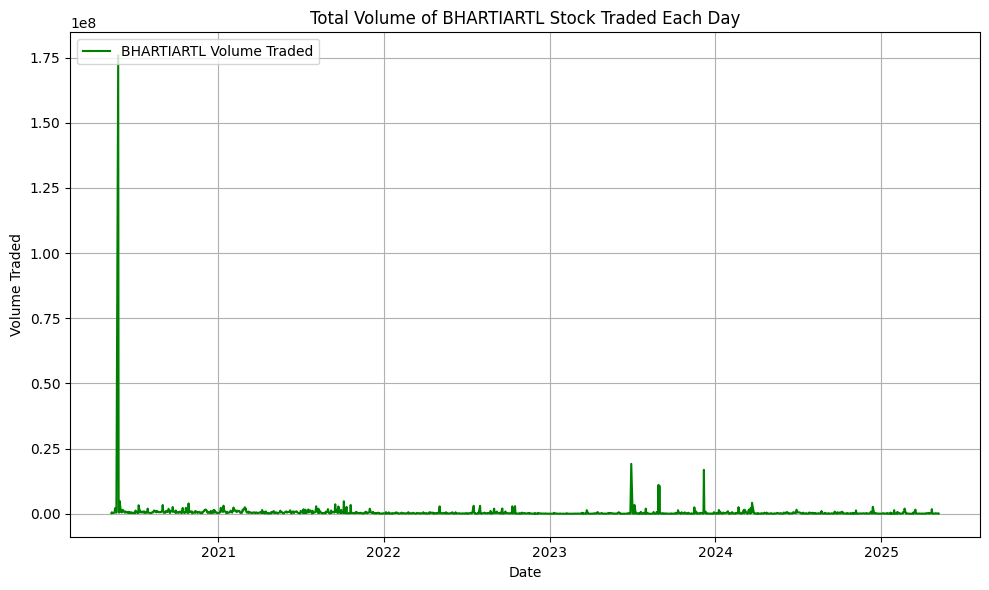

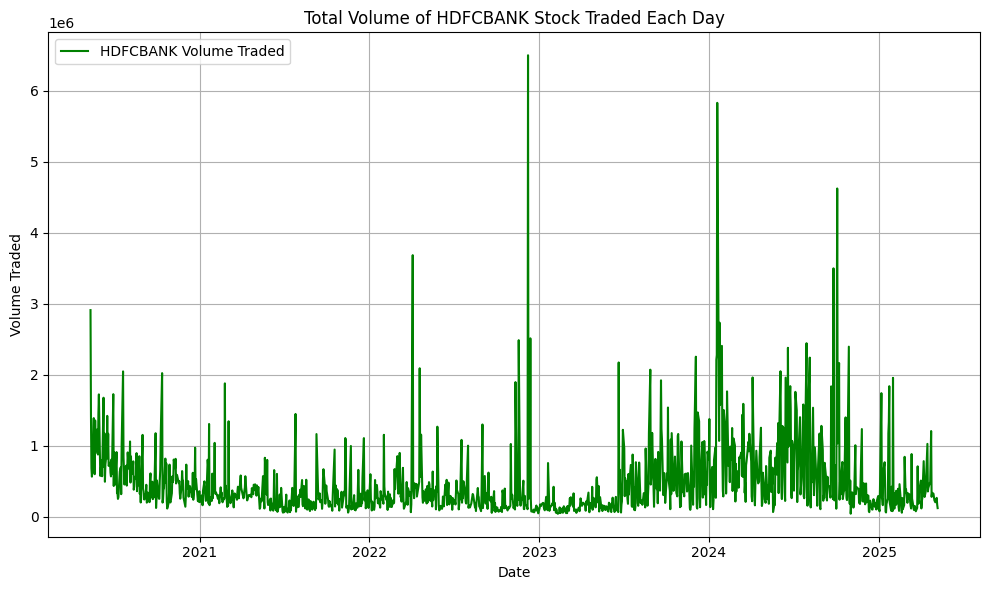

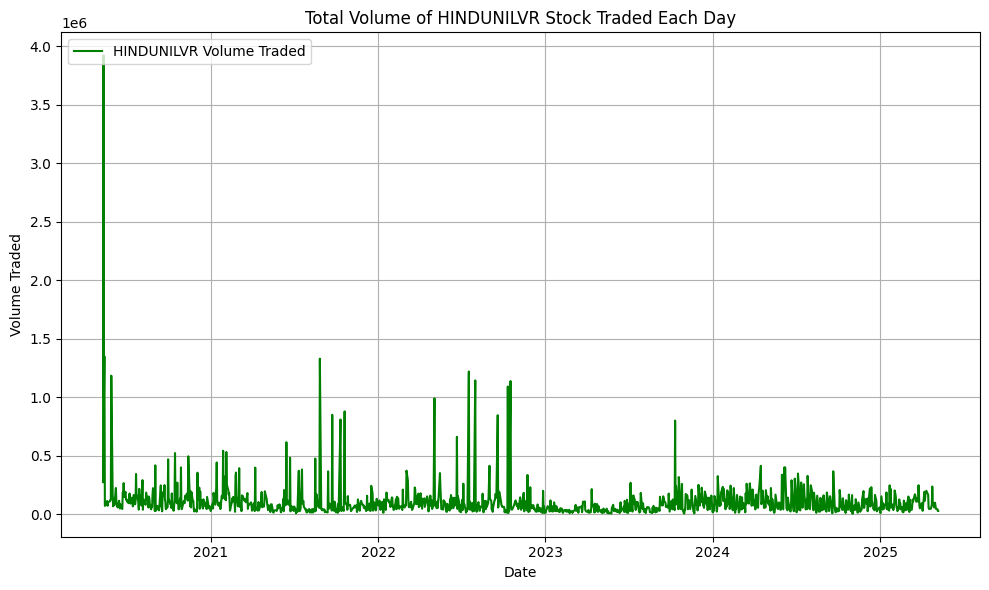

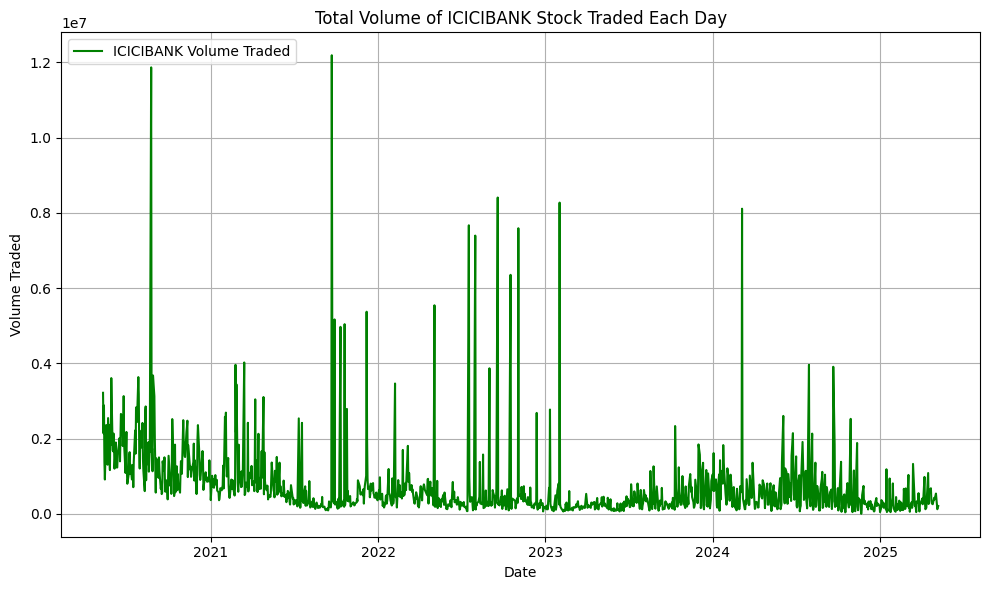

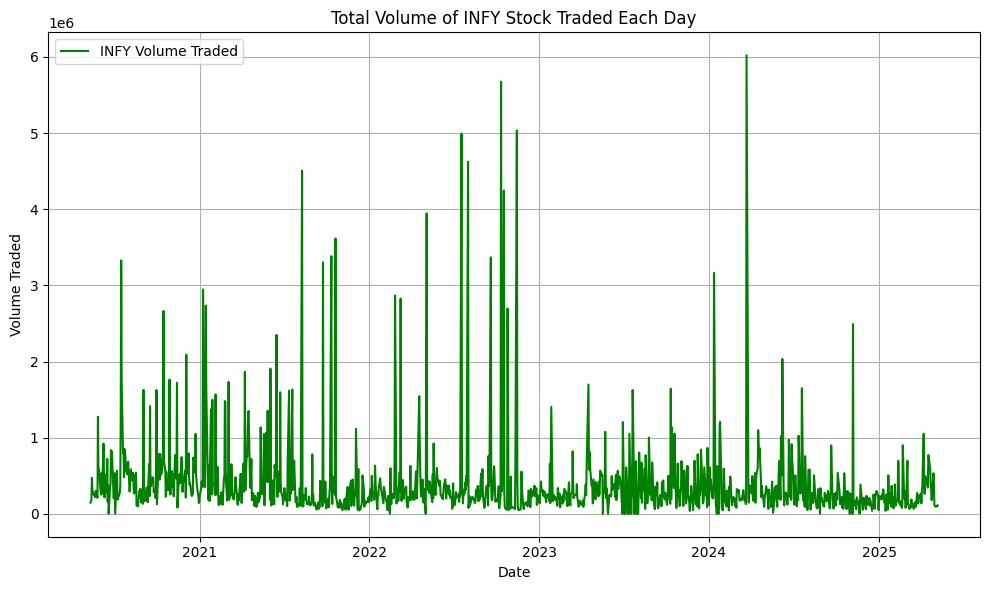

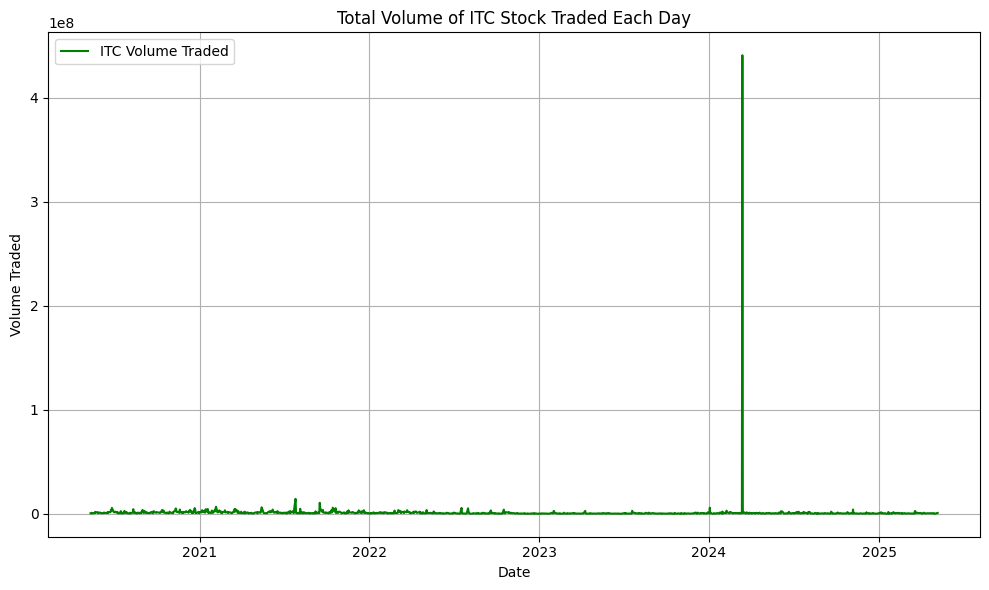

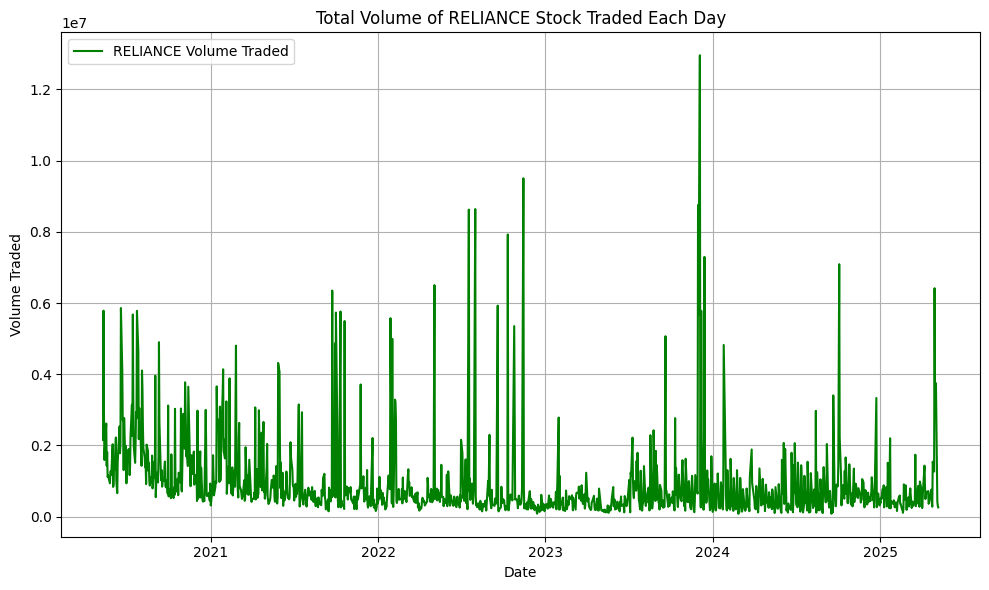

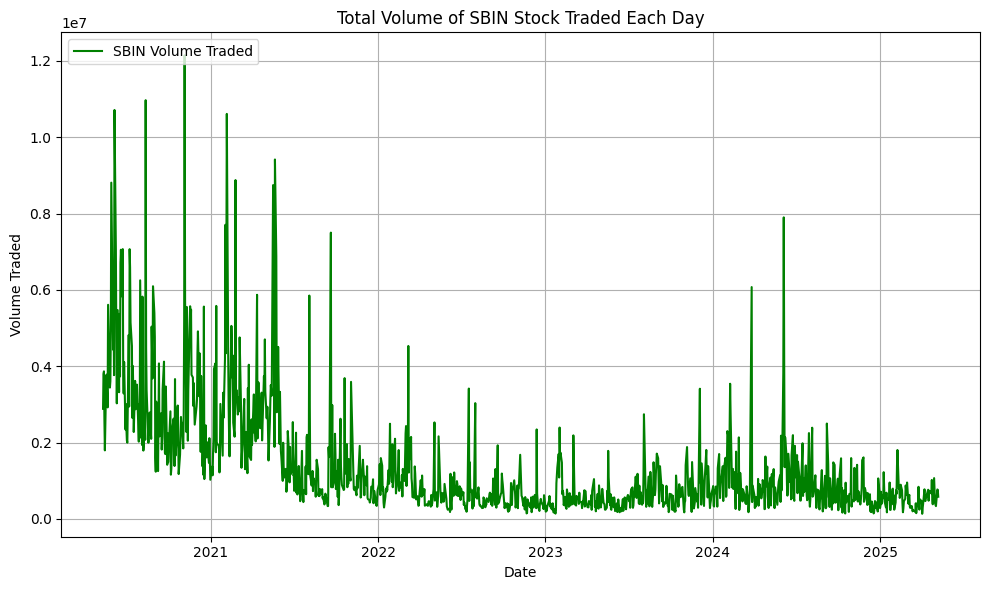

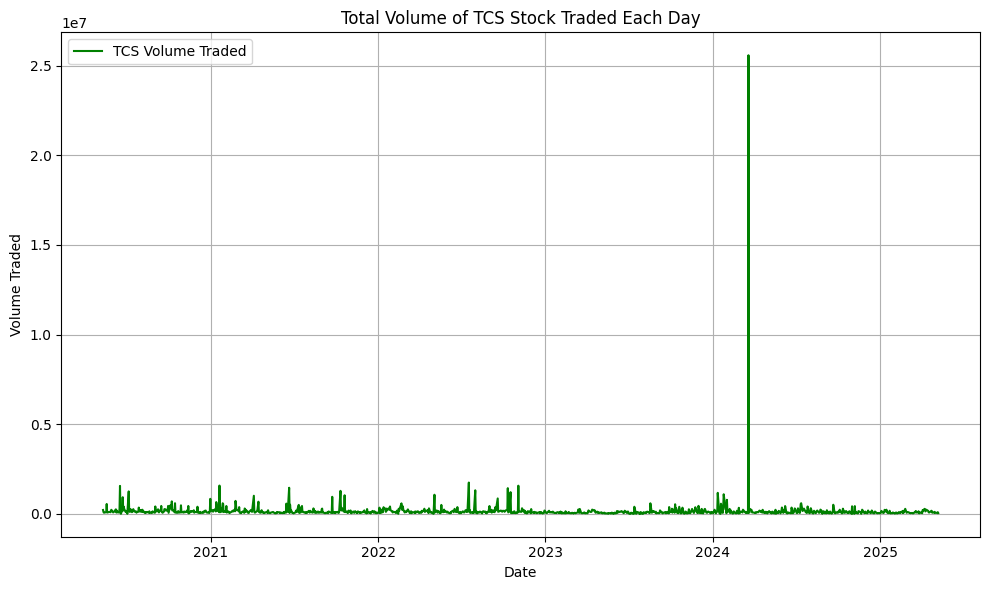

In [6]:
# Plot volume traded for each stock
for stock_name, df in stock_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['volume'], color='green', linestyle='-', linewidth=1.5, label=f'{stock_name} Volume Traded')
    plt.title(f'Total Volume of {stock_name} Stock Traded Each Day')
    plt.xlabel('Date')
    plt.ylabel('Volume Traded')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [7]:
# List of moving average window sizes
MA_days = [10, 20, 50, 100]

In [8]:
# Calculate moving averages
for ma in MA_days:
    column_name = f'MA_{ma}_days'
    df[column_name] = df['close'].rolling(window=ma).mean()

    stock_data[stock_name] = df

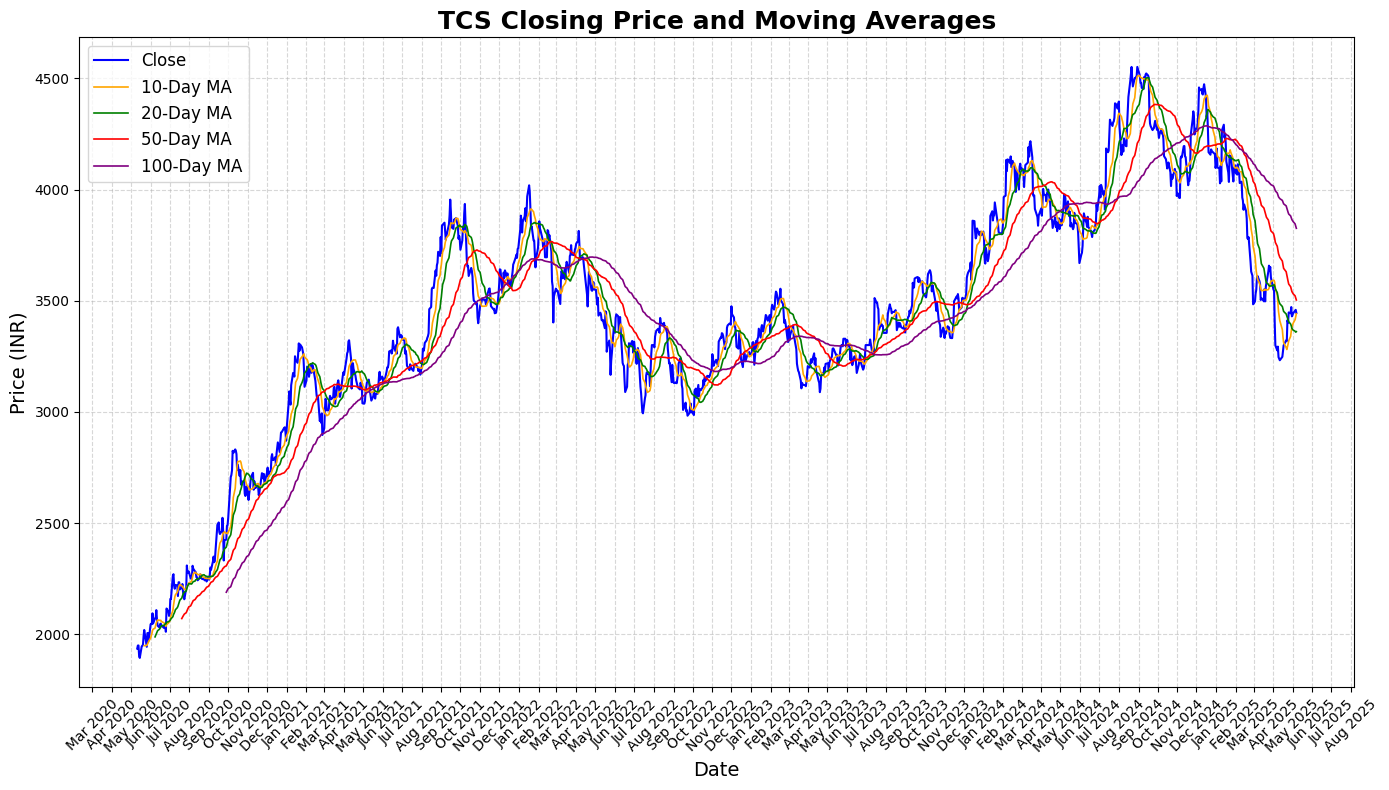

In [9]:
import matplotlib.dates as mdates
# Pick a stock to visualize
stock_name = 'TCS'
df = stock_data[stock_name].copy()

# Ensure date is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Plot with date-based x-axis
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the plot
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


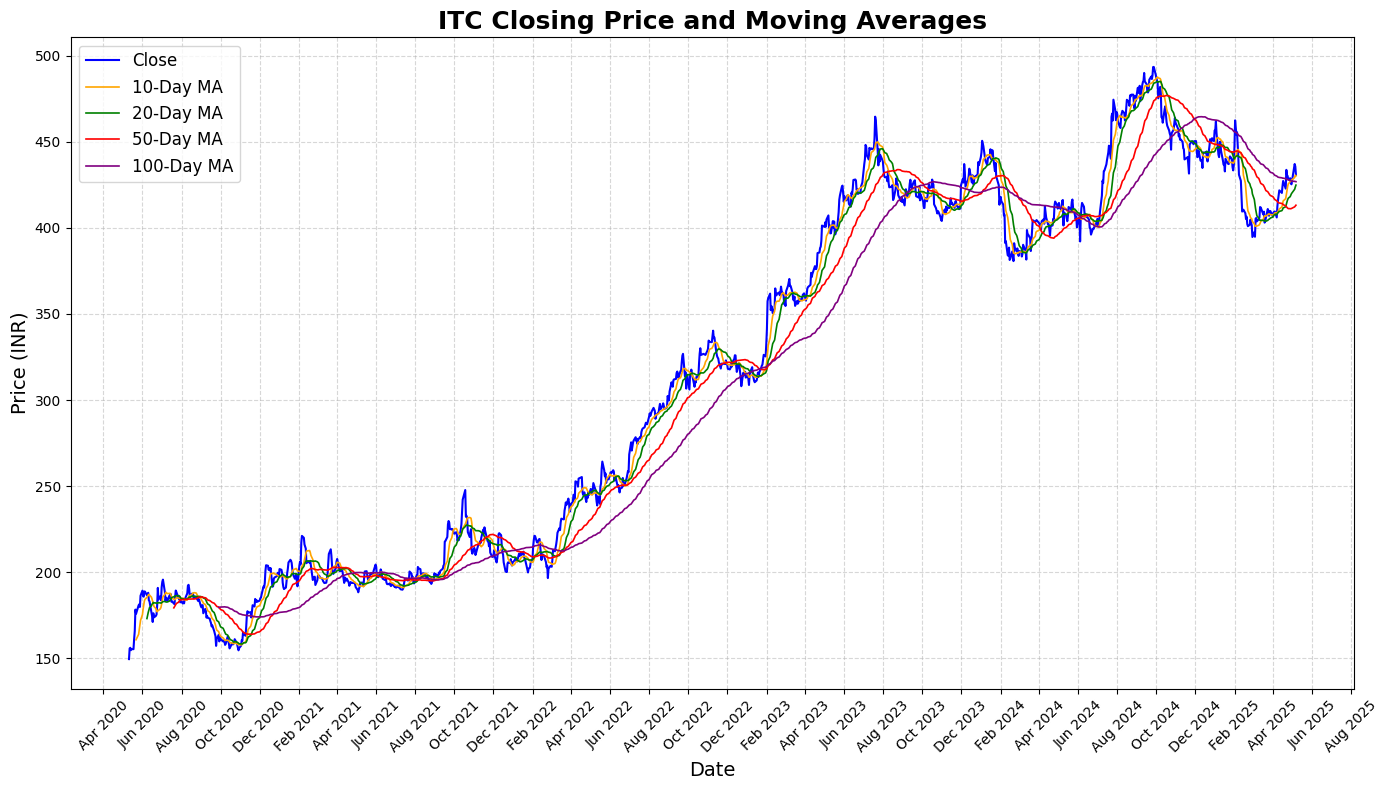

In [10]:
# Pick a stock to visualize
stock_name = 'ITC'
df = stock_data[stock_name].copy()

# Ensure timestamp is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Compute moving averages with clean column names
MA_days = [10, 20, 50, 100]
for ma in MA_days:
    df[f'MA_{ma}_days'] = df['close'].rolling(window=ma).mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the chart
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

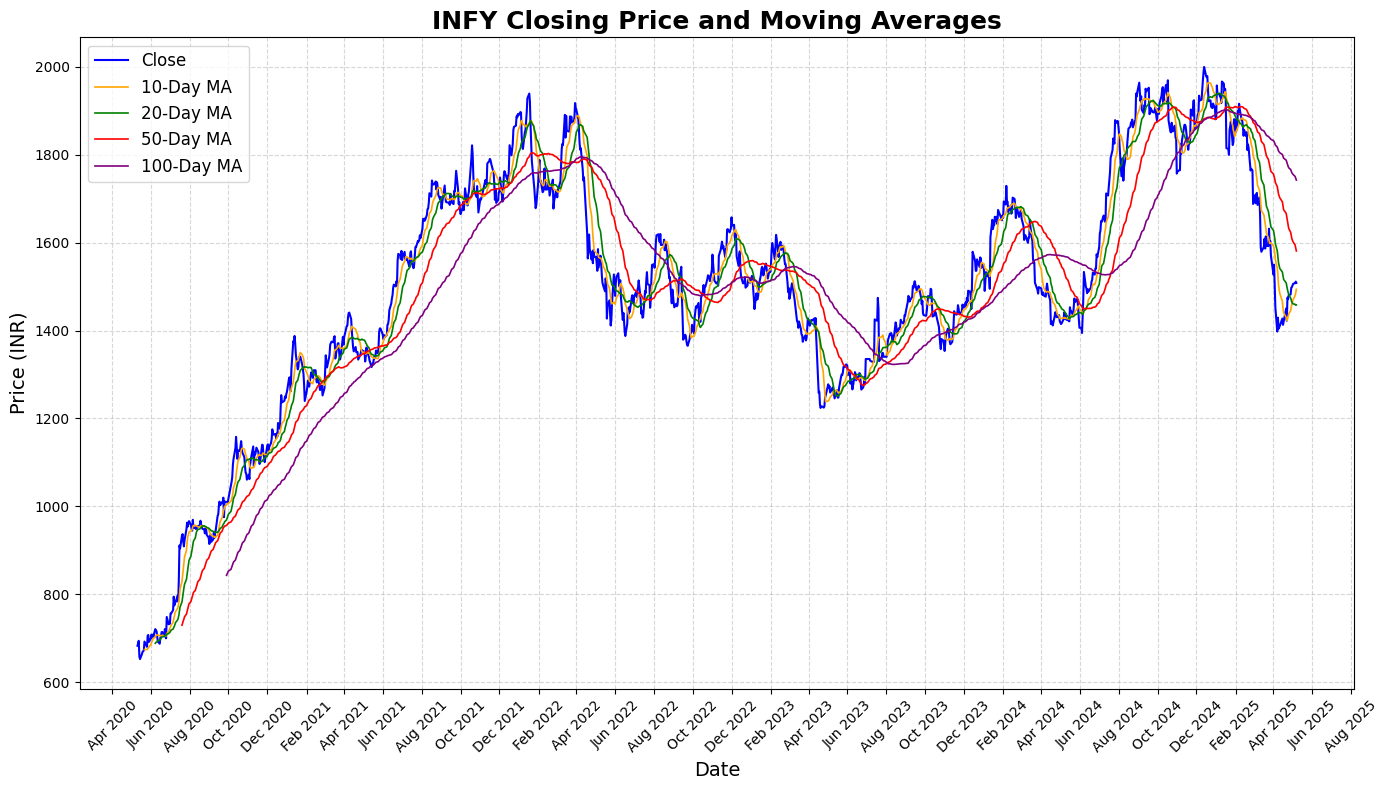

In [11]:
# Pick a stock to visualize
stock_name = 'INFY'
df = stock_data[stock_name].copy()

# Ensure timestamp is datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Compute moving averages with clean column names
MA_days = [10, 20, 50, 100]
for ma in MA_days:
    df[f'MA_{ma}_days'] = df['close'].rolling(window=ma).mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['close'], label='Close', color='blue', linewidth=1.5)
plt.plot(df['MA_10_days'], label='10-Day MA', color='orange', linewidth=1.2)
plt.plot(df['MA_20_days'], label='20-Day MA', color='green', linewidth=1.2)
plt.plot(df['MA_50_days'], label='50-Day MA', color='red', linewidth=1.2)
plt.plot(df['MA_100_days'], label='100-Day MA', color='purple', linewidth=1.2)

# Beautify the chart
plt.title(f'{stock_name} Closing Price and Moving Averages', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

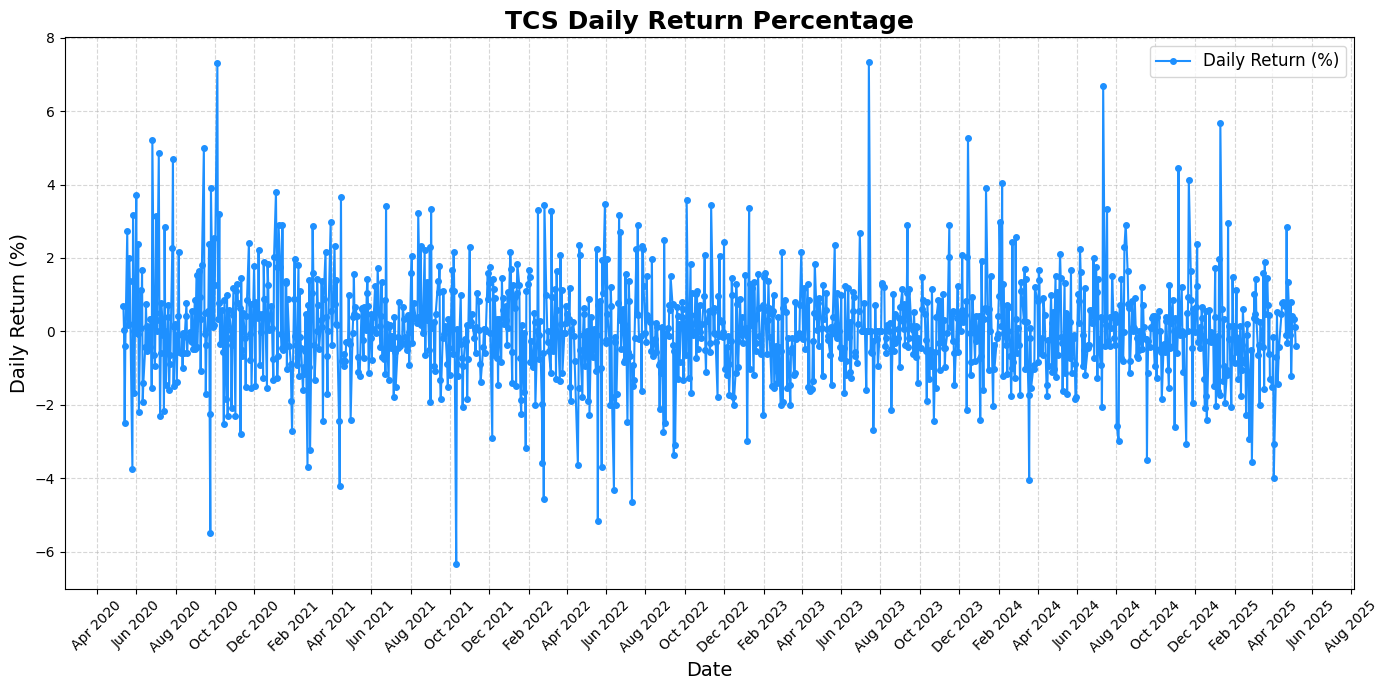

In [12]:
# Select stock (change 'TCS' to 'INFY', 'ITC', etc. as needed)
stock_name = 'TCS'
df = stock_data[stock_name].copy()

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Calculate daily returns as percentage
df['Daily Return'] = df['close'].pct_change() * 100

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Return'], 
         linestyle='-', color='dodgerblue', linewidth=1.5, marker='o', markersize=4, label='Daily Return (%)')

# Beautify the chart
plt.title(f'{stock_name} Daily Return Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

# Format x-axis ticks for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Final layout adjustment
plt.tight_layout()
plt.show()


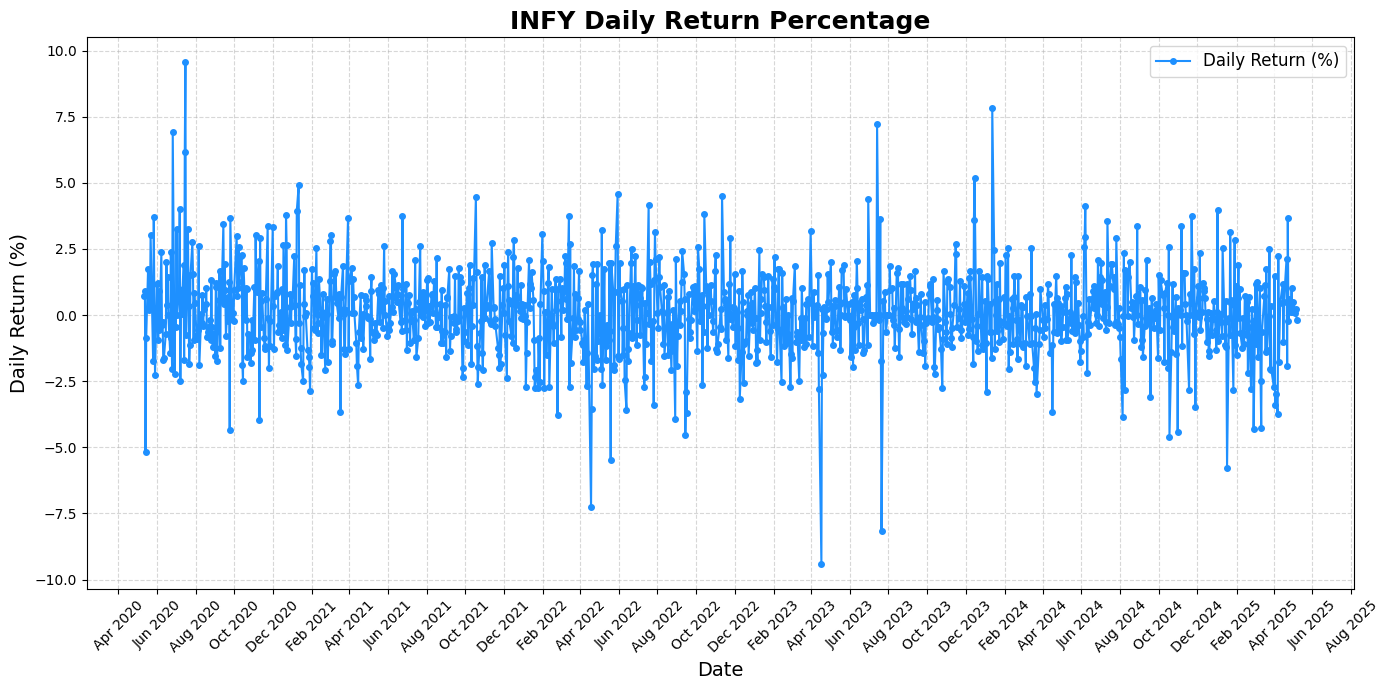

In [13]:
stock_name = 'INFY'
df = stock_data[stock_name].copy()

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Calculate daily returns as percentage
df['Daily Return'] = df['close'].pct_change() * 100

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Return'], 
         linestyle='-', color='dodgerblue', linewidth=1.5, marker='o', markersize=4, label='Daily Return (%)')

# Beautify the chart
plt.title(f'{stock_name} Daily Return Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

# Format x-axis ticks for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Final layout adjustment
plt.tight_layout()
plt.show()


    timestamp     open       high        low      close  volume
0  2025-05-07  3449.95  3458.3501  3421.3000  3445.2000   40003
1  2025-05-06  3456.45  3473.8000  3435.9500  3458.9500   88329
2  2025-05-05  3445.05  3503.8000  3445.0500  3455.1499   47732
3  2025-05-02  3474.50  3491.8000  3421.1001  3443.8000   54402
4  2025-04-30  3471.50  3509.6001  3367.8501  3429.6499   52154


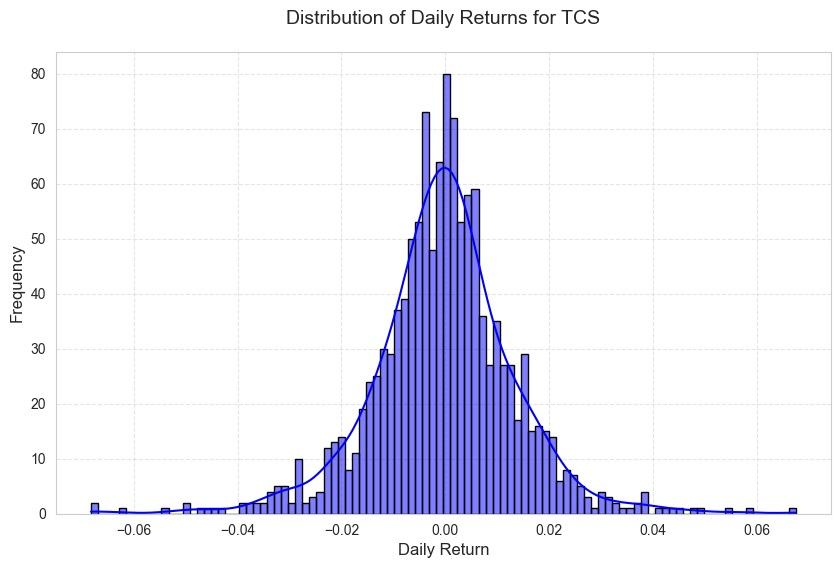

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
tcs = pd.read_csv('stock_data/TCS.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(tcs.head())

# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
tcs['timestamp'] = pd.to_datetime(tcs['timestamp'])

# Set 'timestamp' as the index for easier manipulation
tcs.set_index('timestamp', inplace=True)

# Calculate daily returns
tcs['Daily Return'] = tcs['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(tcs['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for TCS', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


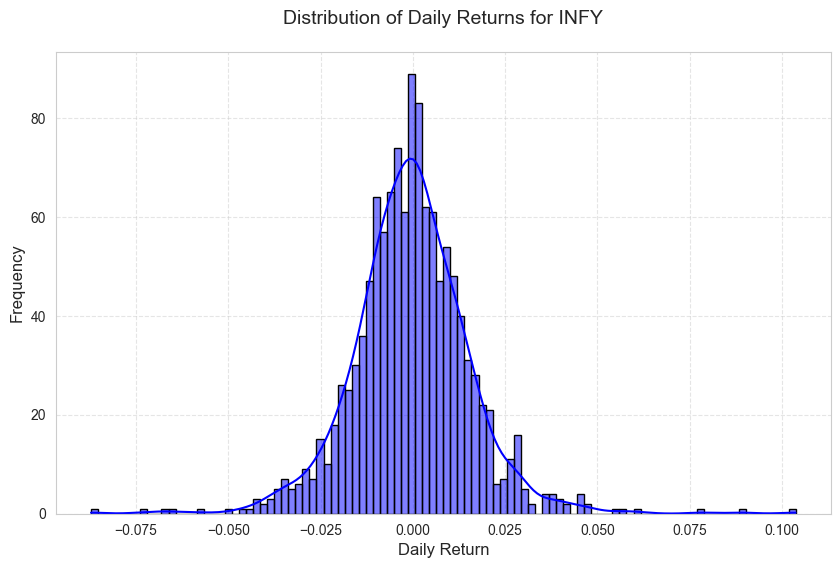

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
infy = pd.read_csv('stock_data/INFY.csv')
# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
infy['timestamp'] = pd.to_datetime(infy['timestamp'])

# Set 'timestamp' as the index for easier manipulation
infy.set_index('timestamp', inplace=True)

# Calculate daily returns
infy['Daily Return'] = infy['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(infy['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for INFY', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


    timestamp     open     high      low    close   volume
0  2025-05-07  1412.05  1424.90  1402.15  1406.00   262093
1  2025-05-06  1432.00  1432.00  1410.35  1420.55   311563
2  2025-05-05  1427.00  1439.75  1427.00  1431.10   428786
3  2025-05-02  1408.40  1426.00  1408.40  1421.95  3746656
4  2025-04-30  1404.90  1411.85  1373.50  1408.35  3375628


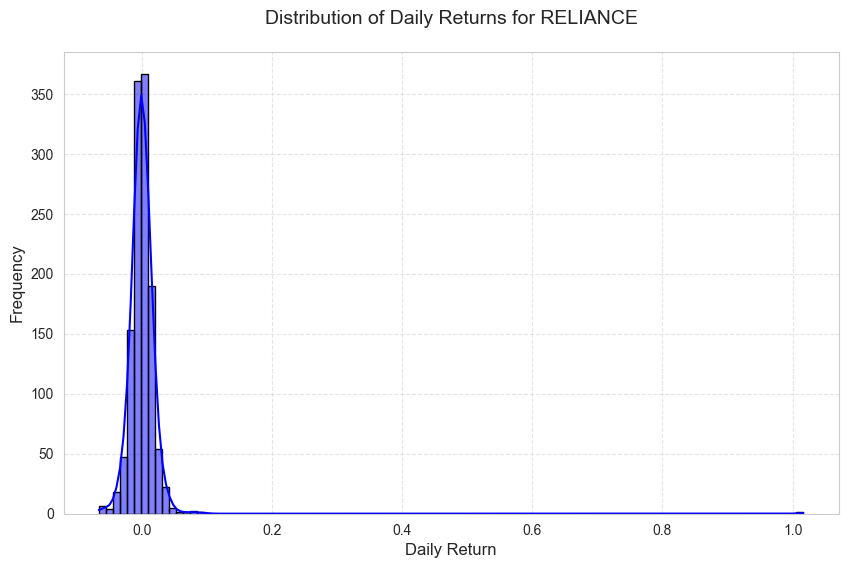

In [16]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Load the TCS stock data from the CSV file
reliance = pd.read_csv('stock_data/RELIANCE.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(reliance.head())

# Assuming the data has a 'timestamp' column and 'close' column
# Convert 'timestamp' column to datetime (if not already in datetime format)
reliance['timestamp'] = pd.to_datetime(reliance['timestamp'])

# Set 'timestamp' as the index for easier manipulation
reliance.set_index('timestamp', inplace=True)

# Calculate daily returns
reliance['Daily Return'] = reliance['close'].pct_change()

# Create the distribution plot for TCS
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.histplot(reliance['Daily Return'].dropna(), bins=100, color='blue', kde=True, edgecolor="k", linewidth=1)

# Set the plot axis labels
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Distribution of Daily Returns for RELIANCE', fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [17]:
asianpaints = pd.read_csv('stock_data/ASIANPAINT.csv')
bhartiartl = pd.read_csv('stock_data/BHARTIARTL.csv')
hdfcbank = pd.read_csv('stock_data/HDFCBANK.csv')
hindunilvr = pd.read_csv('stock_data/HINDUNILVR.csv')
itc = pd.read_csv('stock_data/ITC.csv') 
sbin = pd.read_csv('stock_data/SBIN.csv')
iciciabank = pd.read_csv('stock_data/ICICIBANK.csv')
reliance = pd.read_csv('stock_data/RELIANCE.csv')
tcs = pd.read_csv('stock_data/TCS.csv')
infy = pd.read_csv('stock_data/INFY.csv')


In [18]:
tcs = pd.read_csv('stock_data/tcs.csv', parse_dates=['timestamp'])
tcs.sort_values('timestamp', inplace=True)
tcs.set_index('timestamp', inplace=True)

# 2. Compute Returns
# Simple daily returns
tcs['ret_simple'] = tcs['close'].pct_change()                              # :contentReference[oaicite:3]{index=3}
# Log returns for GBM
tcs['ret_log'] = np.log(tcs['close'] / tcs['close'].shift(1))
tcs.dropna(inplace=True)


<Axes: >

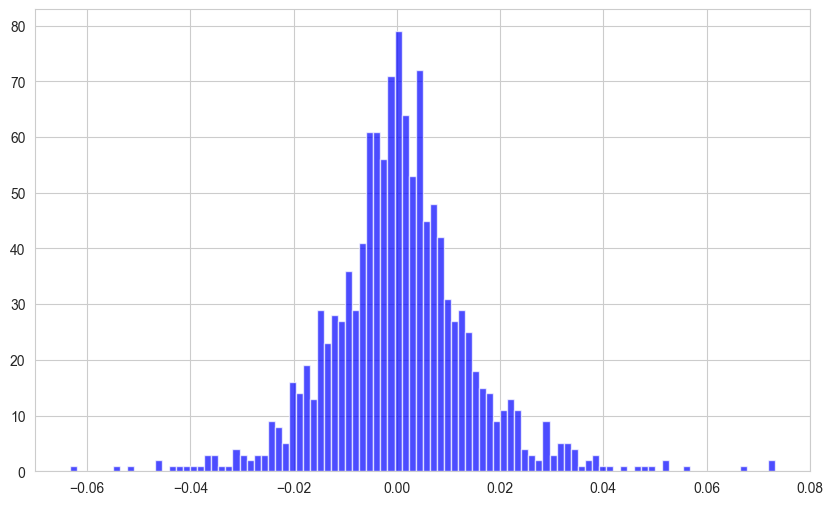

In [19]:
tcs['ret_simple'].hist(bins=100, figsize=(10, 6), color='blue', alpha=0.7)

In [20]:
import scipy.stats as st

# 1. Estimate parameters
mu = tcs['ret_log'].mean()
sigma = tcs['ret_log'].std()

# 2. Monte Carlo GBM paths
def simulate_gbm(S0, mu, sigma, T, steps, n_sims):
    dt = T/steps
    paths = np.zeros((steps+1, n_sims))
    paths[0] = S0
    for t in range(1, steps+1):
        z = np.random.standard_normal(n_sims)
        paths[t] = paths[t-1] * np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)
    return paths

S0 = tcs['close'].iloc[-1]
paths = simulate_gbm(S0, mu, sigma, T=1/252, steps=1, n_sims=100000)  # 1‑day horizon :contentReference[oaicite:4]{index=4}

# 3. Compute returns and VaR
sim_returns = paths[-1]/S0 - 1
var_95 = -np.percentile(sim_returns, 5)
var_99 = -np.percentile(sim_returns, 1)
print(f"1 - day VaR 95%: {var_95:.4%}, VaR 99%: {var_99:.4%}")       # :contentReference[oaicite:5]{index=5}


1 - day VaR 95%: 0.1420%, VaR 99%: 0.2018%


1-Day VaR at 95%: -0.14% → ₹4.95
1-Day VaR at 99%: -0.20% → ₹6.99


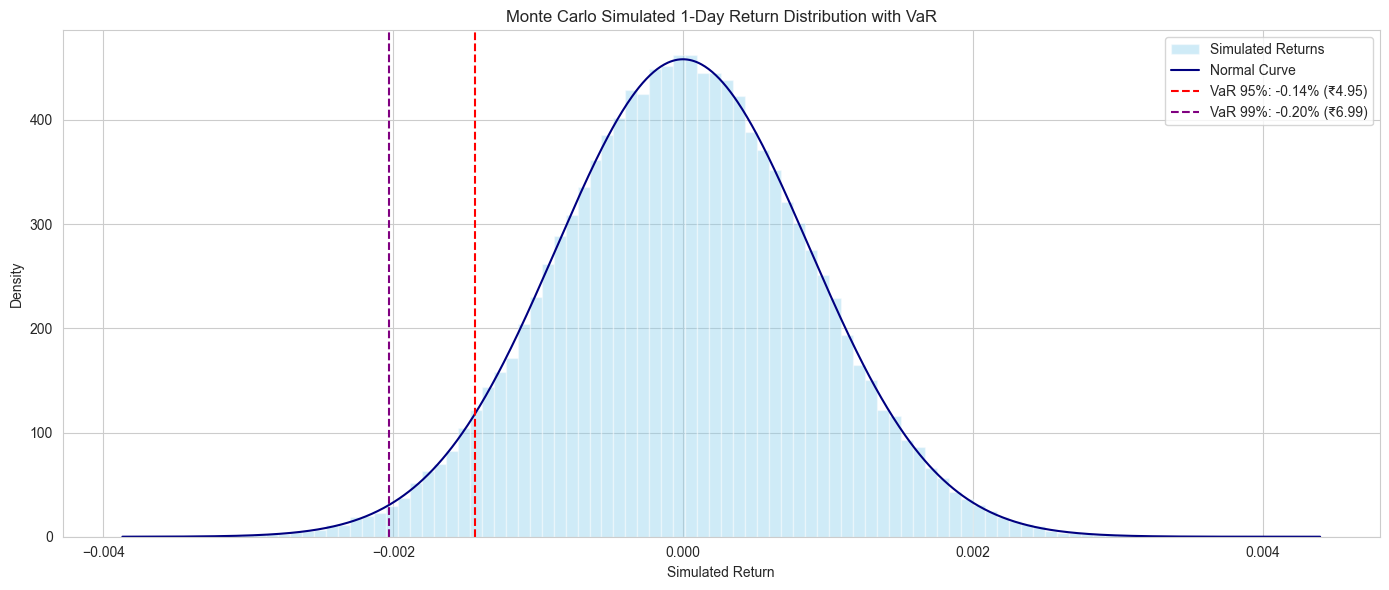

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# 0. Make sure 'ret_log' exists
tcs['ret_log'] = np.log(tcs['close'] / tcs['close'].shift(1))
tcs.dropna(inplace=True)

# 1. Estimate parameters
mu = tcs['ret_log'].mean()
sigma = tcs['ret_log'].std()

# 2. Monte Carlo GBM simulation function
def simulate_gbm(S0, mu, sigma, T, steps, n_sims):
    dt = T / steps
    paths = np.zeros((steps + 1, n_sims))
    paths[0] = S0
    for t in range(1, steps + 1):
        z = np.random.standard_normal(n_sims)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return paths

# 3. Setup simulation parameters
S0 = tcs['close'].iloc[-1]  # Current price
paths = simulate_gbm(S0, mu, sigma, T=1/252, steps=1, n_sims=100000)  # 1-day horizon

# 4. Compute simulated returns
sim_returns = paths[-1] / S0 - 1

# 5. Compute VaR in percentage
var_95 = -np.percentile(sim_returns, 5)
var_99 = -np.percentile(sim_returns, 1)

# 6. Compute VaR in ₹ rupees for a portfolio
portfolio_value = S0  # Change this if your portfolio is worth more
var_95_value = var_95 * portfolio_value
var_99_value = var_99 * portfolio_value

# 7. Print results
print(f"1-Day VaR at 95%: {-var_95:.2%} → ₹{var_95_value:,.2f}")
print(f"1-Day VaR at 99%: {-var_99:.2%} → ₹{var_99_value:,.2f}")

# 8. Plot histogram with normal curve and VaR lines
plt.figure(figsize=(14, 6))
count, bins, _ = plt.hist(sim_returns, bins=100, density=True, alpha=0.4, color='skyblue', label='Simulated Returns')

# Plot normal distribution curve
x = np.linspace(min(sim_returns), max(sim_returns), 1000)
pdf = norm.pdf(x, np.mean(sim_returns), np.std(sim_returns))
plt.plot(x, pdf, 'navy', label='Normal Curve')

# Plot VaR lines
plt.axvline(-var_95, color='red', linestyle='--', label=f'VaR 95%: {-var_95:.2%} (₹{var_95_value:.2f})')
plt.axvline(-var_99, color='purple', linestyle='--', label=f'VaR 99%: {-var_99:.2%} (₹{var_99_value:.2f})')

# Final touches
plt.title('Monte Carlo Simulated 1-Day Return Distribution with VaR')
plt.xlabel('Simulated Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



ADF Statistic: -2.7421763123501472
p-value: 0.0670199270419421
Series is non-stationary. Differencing will be applied.
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13046.273, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13047.915, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13047.903, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13045.109, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13047.868, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.317 seconds


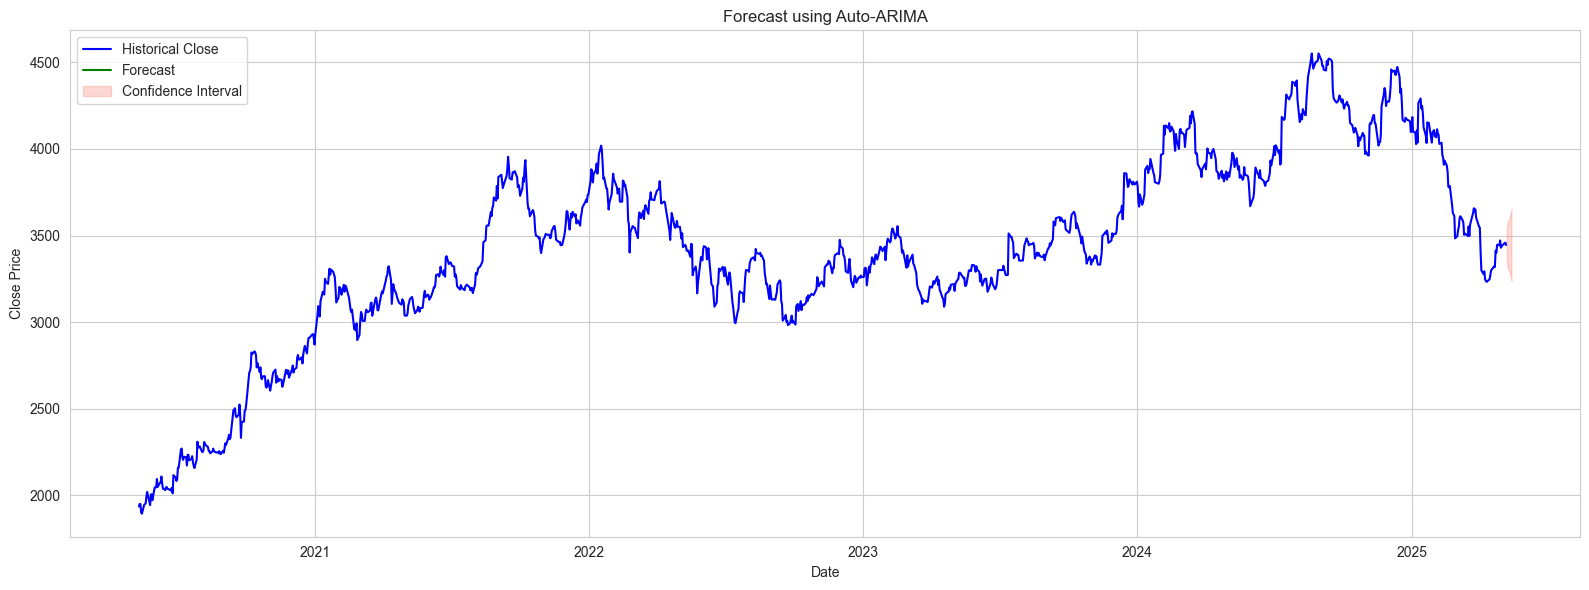

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load and clean data
tcs = pd.read_csv("stock_data/TCS.csv", parse_dates=['timestamp'], index_col='timestamp')
tcs = tcs.sort_index()
tcs = tcs.dropna(subset=['close'])

# Stationarity check (ADF Test)
result = adfuller(tcs['close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print("Series is non-stationary. Differencing will be applied.")
else:
    print("Series is stationary.")

# Fit Auto-ARIMA
arima_model = pm.auto_arima(
    tcs['close'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,  # let auto_arima decide differencing
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Forecast
n_forecast = 5
fc, conf_int = arima_model.predict(n_periods=n_forecast, return_conf_int=True)
forecast_index = pd.date_range(tcs.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='B')
fc_series = pd.Series(fc, index=forecast_index)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(tcs['close'], label="Historical Close", color='blue')
plt.plot(fc_series, label="Forecast", color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='salmon', alpha=0.3, label="Confidence Interval")
plt.title("Forecast using Auto-ARIMA")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Assuming this is a separate CSV or loaded DataFrame
tcs = pd.read_csv("stock_data/TCS.csv", parse_dates=['timestamp'])
tcs.set_index('timestamp', inplace=True)
tcs.sort_index(inplace=True)


In [33]:
tcs['SMA_10'] = trend.sma_indicator(tcs['close'], window=10)
tcs['EMA_10'] = trend.ema_indicator(tcs['close'], window=10)
tcs['WMA_10'] = tcs['close'].rolling(window=10).apply(
    lambda x: np.dot(x, np.arange(1, 11)) / np.arange(1, 11).sum(), raw=True)

tcs['RSI_14'] = momentum.rsi(tcs['close'], window=14)
tcs['MACD'] = trend.macd(tcs['close'])

bb = volatility.BollingerBands(close=tcs['close'], window=20, window_dev=2)
tcs['BB_High'] = bb.bollinger_hband()
tcs['BB_Low'] = bb.bollinger_lband()

# Display the results
print(tcs[['close', 'SMA_10', 'EMA_10', 'WMA_10', 'RSI_14', 'MACD', 'BB_High', 'BB_Low']].tail(20))


                close      SMA_10       EMA_10       WMA_10     RSI_14  \
timestamp                                                                
2025-04-04  3299.4500  3555.89498  3506.842708  3510.629076  25.452276   
2025-04-07  3276.6001  3525.61500  3464.980415  3459.848189  24.543109   
2025-04-08  3293.5500  3491.81500  3433.811249  3417.654553  26.636566   
2025-04-09  3246.1001  3450.65501  3399.681949  3372.979116  24.580624   
2025-04-11  3232.3000  3410.33501  3369.248867  3333.278205  24.000417   
2025-04-15  3247.7000  3369.94002  3347.149073  3303.708204  26.096828   
2025-04-16  3272.7500  3336.77002  3333.621969  3286.037291  29.503306   
2025-04-17  3298.9500  3311.63001  3327.317975  3279.160924  32.982730   
2025-04-21  3321.6001  3289.29002  3326.278361  3280.973667  35.926933   
2025-04-22  3318.0500  3280.70503  3324.782295  3286.202755  35.662481   
2025-04-23  3412.3000  3291.99003  3340.694605  3310.129113  46.848351   
2025-04-24  3401.2500  3304.45502  335

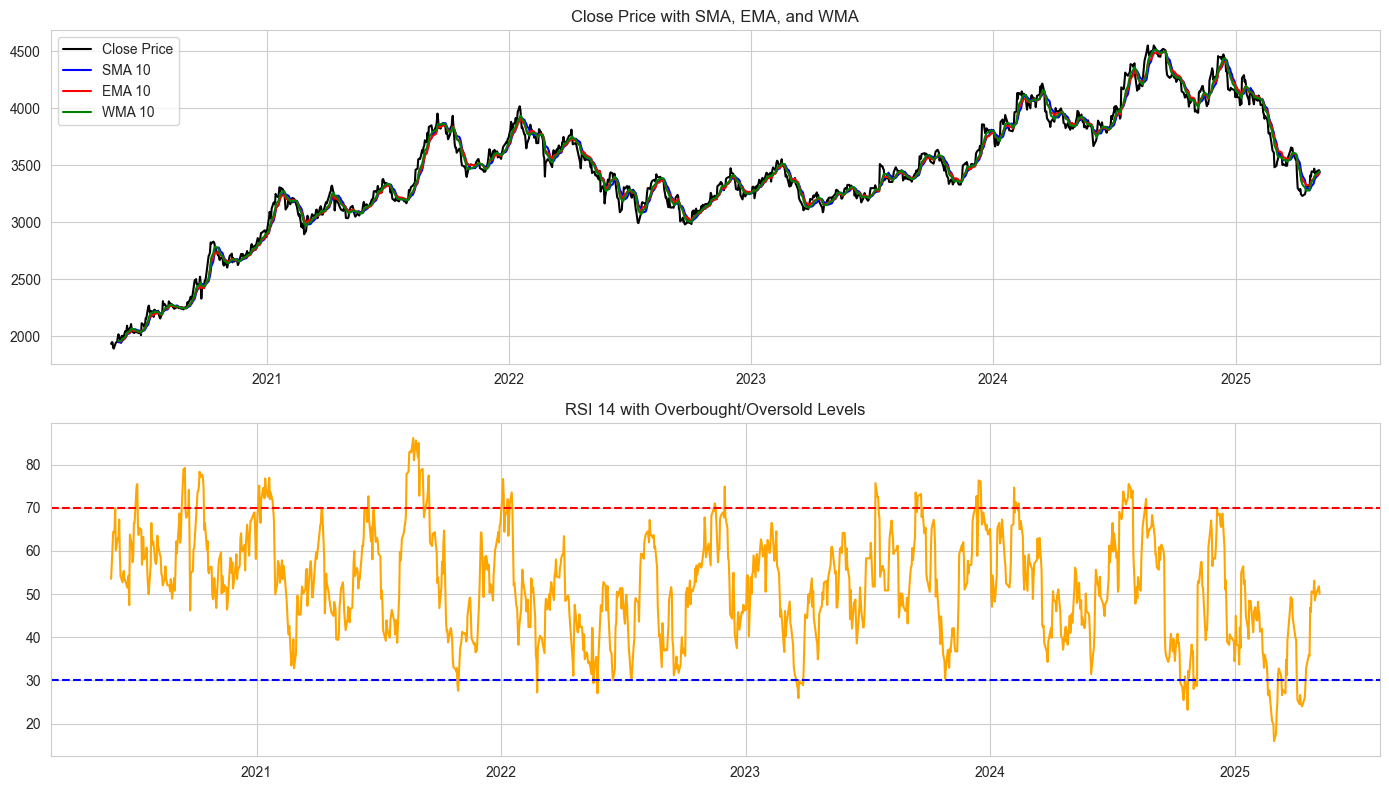

In [34]:
import matplotlib.pyplot as plt

# Plot the closing price with indicators
plt.figure(figsize=(14, 8))

# Plot the closing price
plt.subplot(2, 1, 1)
plt.plot(tcs['close'], label='Close Price', color='black')
plt.plot(tcs['SMA_10'], label='SMA 10', color='blue')
plt.plot(tcs['EMA_10'], label='EMA 10', color='red')
plt.plot(tcs['WMA_10'], label='WMA 10', color='green')
plt.title('Close Price with SMA, EMA, and WMA')
plt.legend()

# Plot the RSI and MACD
plt.subplot(2, 1, 2)
plt.plot(tcs['RSI_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('RSI 14 with Overbought/Oversold Levels')

plt.tight_layout()
plt.show()


In [37]:
df.head()

close
timestamp          
2020-05-11  1935.30
2020-05-12  1948.95
2020-05-13  1949.45
2020-05-14  1900.80
2020-05-15  1893.30

Epoch 10/200, Loss: 0.002993
Epoch 20/200, Loss: 0.002580
Epoch 30/200, Loss: 0.001930
Epoch 40/200, Loss: 0.001563
Epoch 50/200, Loss: 0.001284
Epoch 60/200, Loss: 0.001084
Epoch 70/200, Loss: 0.000942
Epoch 80/200, Loss: 0.000992
Epoch 90/200, Loss: 0.001077
Epoch 100/200, Loss: 0.000831
Epoch 110/200, Loss: 0.000744
Epoch 120/200, Loss: 0.000727
Epoch 130/200, Loss: 0.000729
Epoch 140/200, Loss: 0.000846
Epoch 150/200, Loss: 0.000675
Epoch 160/200, Loss: 0.000696
Epoch 170/200, Loss: 0.000798
Epoch 180/200, Loss: 0.000844
Epoch 190/200, Loss: 0.000649
Epoch 200/200, Loss: 0.000778


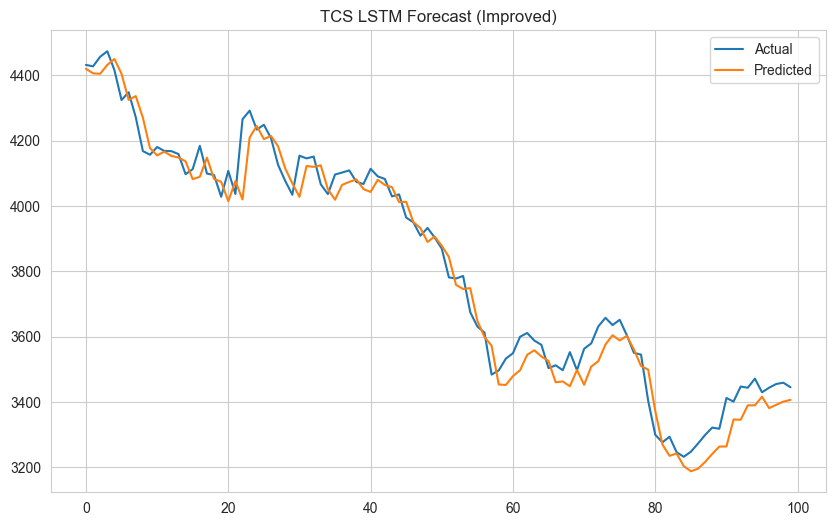

RMSE: 61.75, MAE: 49.00


In [39]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
STOCK_NAME = 'TCS'
EPOCHS = 200
SEQ_LEN = 60
BATCH_SIZE = 32
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Data Preparation ---
df = stock_data[STOCK_NAME][['timestamp', 'close']].copy()
df.set_index('timestamp', inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(scaled_data, SEQ_LEN)
X_train, y_train = X[:-100], y[:-100]
X_test, y_test = X[-100:], y[-100:]

# Reshape for PyTorch: (samples, sequence_length, features)
X_train, y_train = torch.tensor(X_train).float(), torch.tensor(y_train).float()
X_test, y_test = torch.tensor(X_test).float(), torch.tensor(y_test).float()

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# --- Advanced LSTM Model ---
class AdvancedLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=256, num_layers=4, dropout=0.4):
        super(AdvancedLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])  # Only last output
        return self.fc(out)

model = AdvancedLSTM().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# --- Training ---
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(DEVICE), batch_y.to(DEVICE)

        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.6f}")

# --- Evaluation ---
model.eval()
with torch.no_grad():
    X_test = X_test.to(DEVICE)
    y_test = y_test.to(DEVICE)
    predictions = model(X_test).cpu().numpy()
    actual = y_test.cpu().numpy()

preds_rescaled = scaler.inverse_transform(predictions)
actual_rescaled = scaler.inverse_transform(actual)

plt.figure(figsize=(10,6))
plt.plot(actual_rescaled, label='Actual')
plt.plot(preds_rescaled, label='Predicted')
plt.title(f'{STOCK_NAME} LSTM Forecast (Improved)')
plt.legend()
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(actual_rescaled, preds_rescaled))
mae = mean_absolute_error(actual_rescaled, preds_rescaled)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')


In [52]:
os.makedirs('models', exist_ok=True)

# 1. Save PyTorch LSTM Model (state dict recommended)
torch.save(model.state_dict(), f'models/lstm.pth')

# 2. Save Scaler
dump(scaler, f'models/scaler.joblib')


['models/scaler.joblib']

Epoch 10/200, Loss: 0.002575
Epoch 20/200, Loss: 0.001998
Epoch 30/200, Loss: 0.001436
Epoch 40/200, Loss: 0.001170
Epoch 50/200, Loss: 0.000966
Epoch 60/200, Loss: 0.001021
Epoch 70/200, Loss: 0.000969
Epoch 80/200, Loss: 0.000875
Epoch 90/200, Loss: 0.000802
Epoch 100/200, Loss: 0.000815
Epoch 110/200, Loss: 0.000755
Epoch 120/200, Loss: 0.000779
Epoch 130/200, Loss: 0.000922
Epoch 140/200, Loss: 0.000662
Epoch 150/200, Loss: 0.000929
Epoch 160/200, Loss: 0.000706
Epoch 170/200, Loss: 0.000654
Epoch 180/200, Loss: 0.000714
Epoch 190/200, Loss: 0.000692
Epoch 200/200, Loss: 0.000642


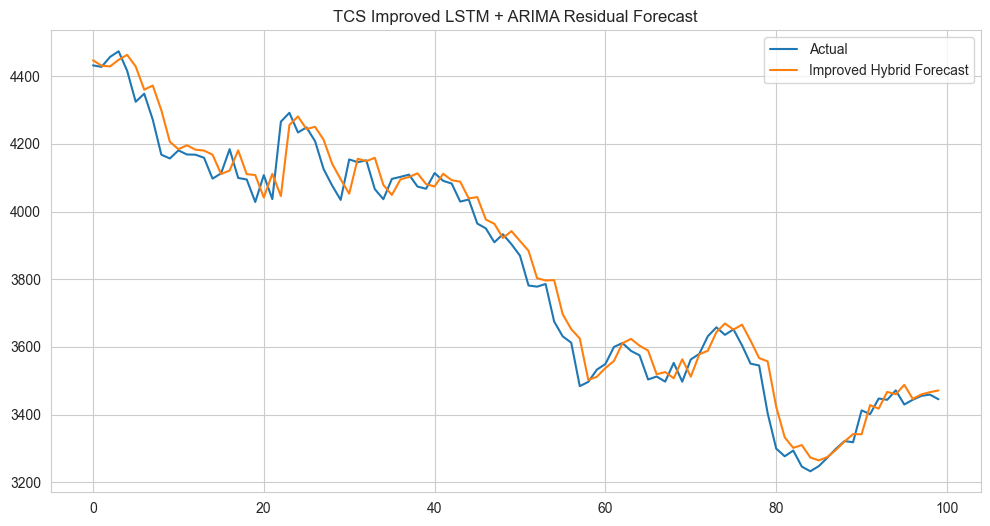

Hybrid RMSE: 58.02, MAE: 42.78


In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# --- Parameters ---
STOCK_NAME = 'TCS'
EPOCHS = 200
SEQ_LEN = 60
BATCH_SIZE = 32
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Data Preparation ---
df = stock_data[STOCK_NAME][['timestamp', 'close']].copy()
df.set_index('timestamp', inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# --- Create Sequences ---
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(scaled_data, SEQ_LEN)
X_train, y_train = X[:-100], y[:-100]
X_test, y_test = X[-100:], y[-100:]

X_train, y_train = torch.tensor(X_train).float(), torch.tensor(y_train).float()
X_test, y_test = torch.tensor(X_test).float(), torch.tensor(y_test).float()
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# --- Advanced LSTM Model ---
class AdvancedLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=256, num_layers=4, dropout=0.4):
        super(AdvancedLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])
        return self.fc(out)

# --- Train LSTM ---
model = AdvancedLSTM().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(DEVICE), batch_y.to(DEVICE)
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.6f}")

# --- Predict Using LSTM ---
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X).float().to(DEVICE)
    lstm_output = model(X_all).cpu().numpy().flatten()

lstm_pred_rescaled = scaler.inverse_transform(lstm_output.reshape(-1, 1)).flatten()
actual_rescaled = scaler.inverse_transform(y.reshape(-1, 1)).flatten()

# --- Residual Calculation ---
residuals = actual_rescaled - lstm_pred_rescaled
train_residuals = residuals[:-100]
test_residuals = residuals[-100:]

# --- Fit ARIMA on Residuals ---
arima_model = ARIMA(train_residuals, order=(2,0,2))
arima_fit = arima_model.fit()
arima_correction = arima_fit.forecast(steps=100)

# --- Final Hybrid Forecast ---
final_hybrid = lstm_pred_rescaled[-100:] + arima_correction

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(actual_rescaled[-100:], label='Actual')
plt.plot(final_hybrid, label='Improved Hybrid Forecast')
plt.title(f'{STOCK_NAME} Improved LSTM + ARIMA Residual Forecast')
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(actual_rescaled[-100:], final_hybrid))
mae = mean_absolute_error(actual_rescaled[-100:], final_hybrid)
print(f'Hybrid RMSE: {rmse:.2f}, MAE: {mae:.2f}')

In [53]:
# Import joblib for saving non-pytorch components
from joblib import dump

# --- Save All Components ---
# 1. Save PyTorch LSTM Model (state dict)
torch.save(model.state_dict(), f"models/lstmhybrid.pth")

# 2. Save ARIMA Model using joblib
dump(arima_fit, f"models/arima.joblib")

# 3. Save Scaler
dump(scaler, f"models/scalerhybrid.joblib")

['models/scalerhybrid.joblib']

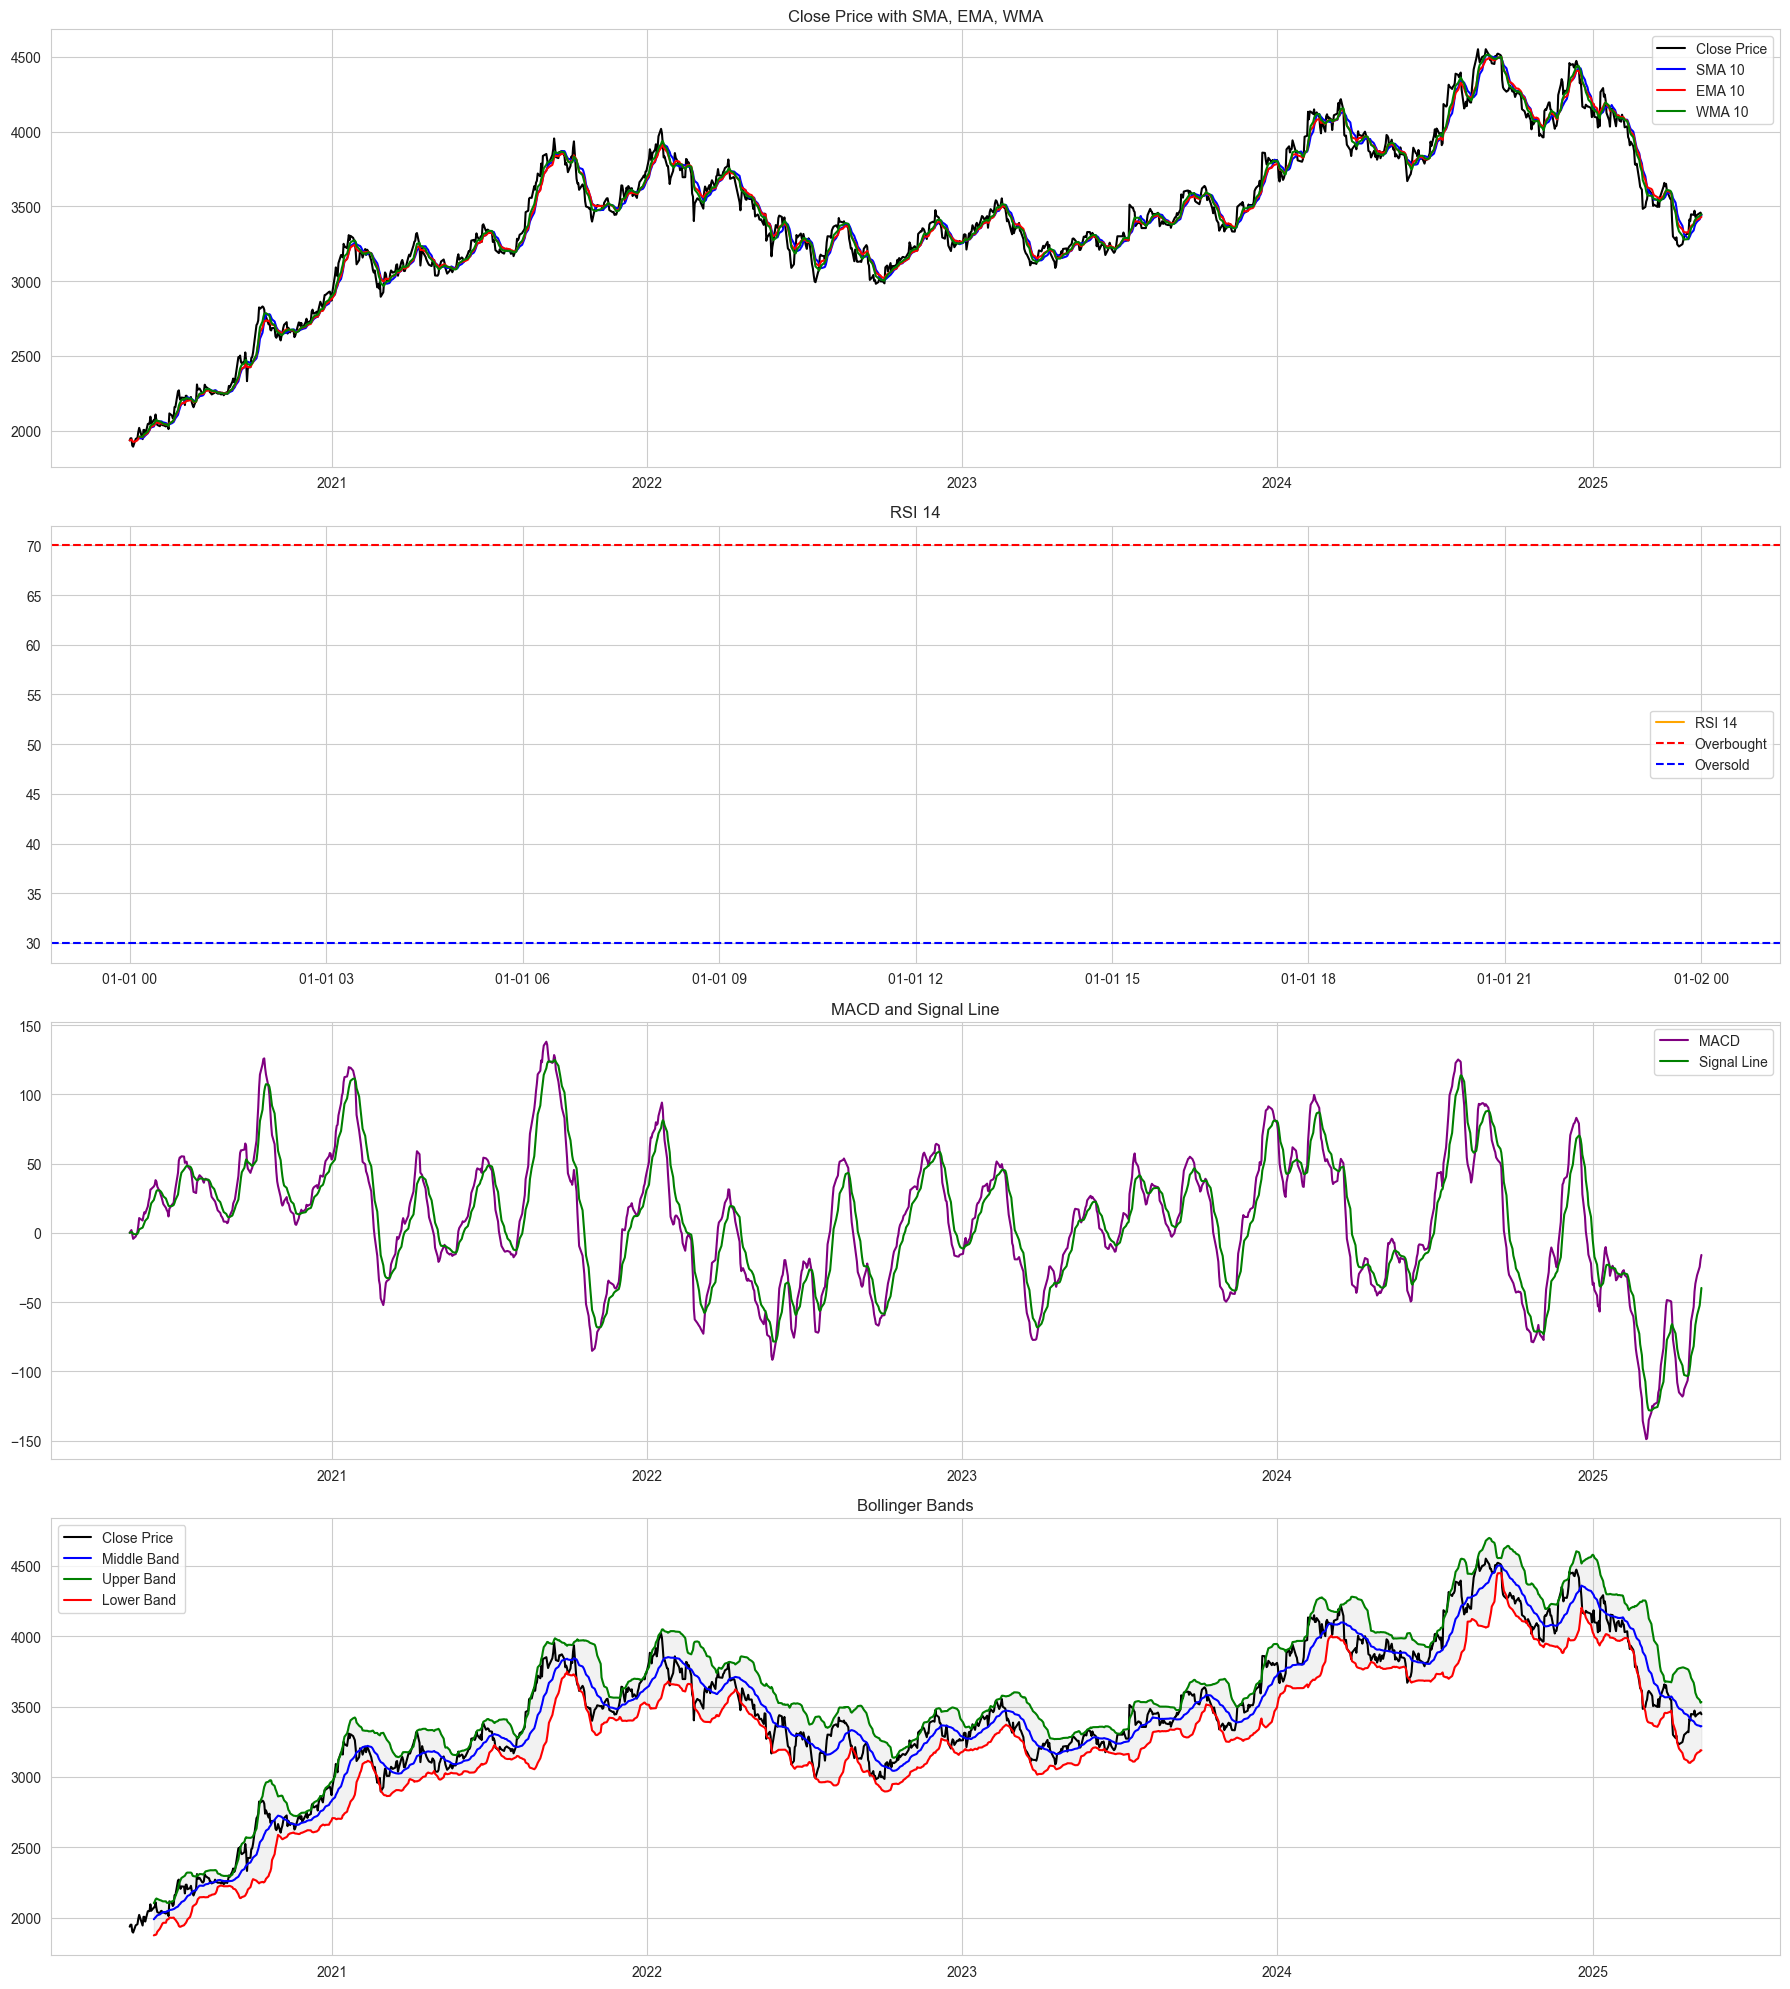

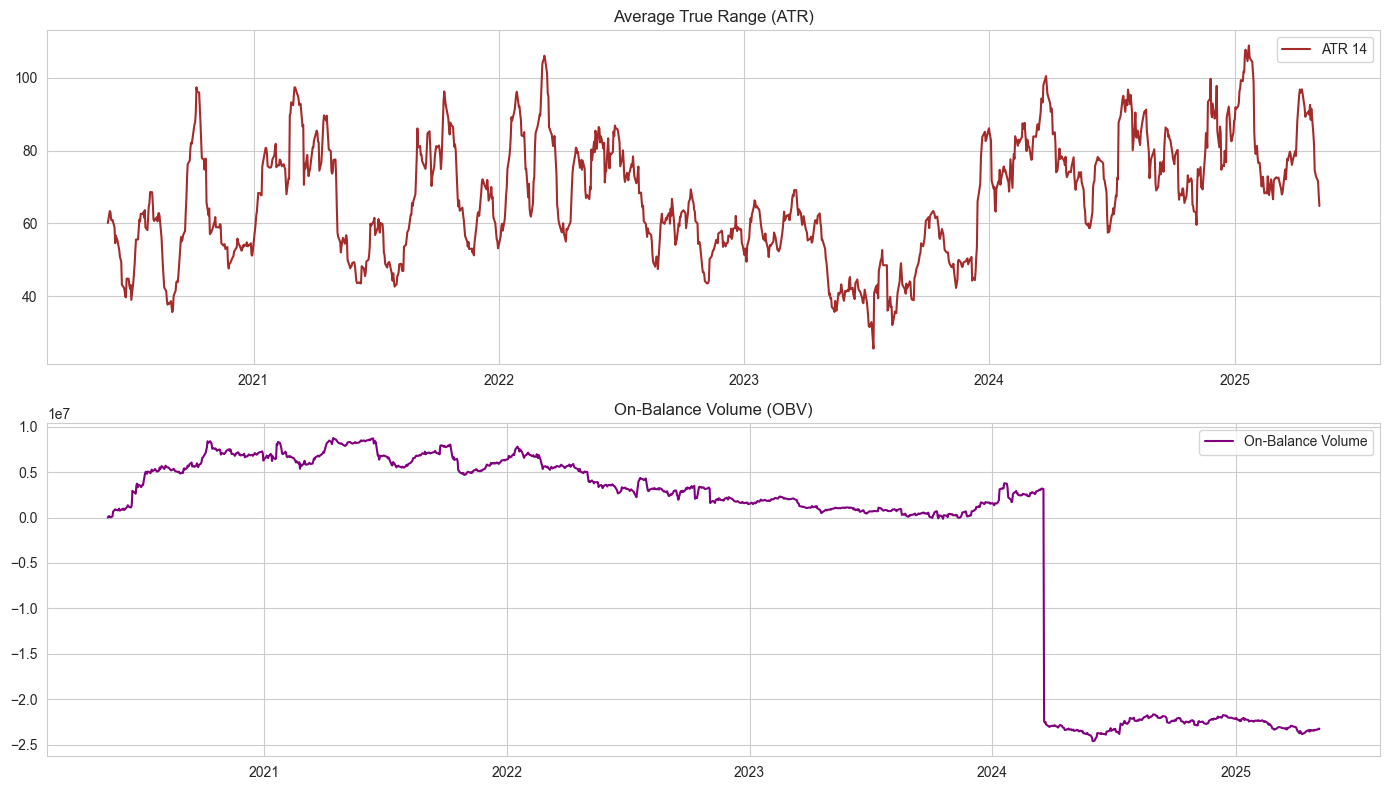

In [43]:
# Sample: make sure these columns exist
# tcs = pd.read_csv('tcs.csv') # Data should have: 'close', 'high', 'low', 'volume'

# Calculate SMA, EMA, WMA
tcs['SMA_10'] = tcs['close'].rolling(window=10).mean()
tcs['EMA_10'] = tcs['close'].ewm(span=10, adjust=False).mean()
weights = np.arange(1, 11)
tcs['WMA_10'] = tcs['close'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

# RSI
delta = tcs['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
tcs['RSI_14'] = 100 - (100 / (1 + rs))

# MACD
tcs['EMA_12'] = tcs['close'].ewm(span=12, adjust=False).mean()
tcs['EMA_26'] = tcs['close'].ewm(span=26, adjust=False).mean()
tcs['MACD'] = tcs['EMA_12'] - tcs['EMA_26']
tcs['MACD_Signal'] = tcs['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
tcs['BB_Middle'] = tcs['close'].rolling(window=20).mean()
tcs['BB_Std'] = tcs['close'].rolling(window=20).std()
tcs['BB_Upper'] = tcs['BB_Middle'] + (2 * tcs['BB_Std'])
tcs['BB_Lower'] = tcs['BB_Middle'] - (2 * tcs['BB_Std'])

# ATR (Average True Range)
tcs['H-L'] = tcs['high'] - tcs['low']
tcs['H-PC'] = np.abs(tcs['high'] - tcs['close'].shift(1))
tcs['L-PC'] = np.abs(tcs['low'] - tcs['close'].shift(1))
tcs['TR'] = tcs[['H-L', 'H-PC', 'L-PC']].max(axis=1)
tcs['ATR_14'] = tcs['TR'].rolling(window=14).mean()

# On-Balance Volume (OBV)
obv = [0]
for i in range(1, len(tcs)):
    if tcs['close'][i] > tcs['close'][i - 1]:
        obv.append(obv[-1] + tcs['volume'][i])
    elif tcs['close'][i] < tcs['close'][i - 1]:
        obv.append(obv[-1] - tcs['volume'][i])
    else:
        obv.append(obv[-1])
tcs['OBV'] = obv

# Plotting
plt.figure(figsize=(18, 20))

# 1. Closing Price + MA
plt.subplot(4, 1, 1)
plt.plot(tcs['close'], label='Close Price', color='black')
plt.plot(tcs['SMA_10'], label='SMA 10', color='blue')
plt.plot(tcs['EMA_10'], label='EMA 10', color='red')
plt.plot(tcs['WMA_10'], label='WMA 10', color='green')
plt.title('Close Price with SMA, EMA, WMA')
plt.legend()

# 2. RSI
plt.subplot(4, 1, 2)
plt.plot(tcs['RSI_14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='blue', linestyle='--', label='Oversold')
plt.title('RSI 14')
plt.legend()

# 3. MACD
plt.subplot(4, 1, 3)
plt.plot(tcs['MACD'], label='MACD', color='purple')
plt.plot(tcs['MACD_Signal'], label='Signal Line', color='green')
plt.title('MACD and Signal Line')
plt.legend()

# 4. Bollinger Bands
plt.subplot(4, 1, 4)
plt.plot(tcs['close'], label='Close Price', color='black')
plt.plot(tcs['BB_Middle'], label='Middle Band', color='blue')
plt.plot(tcs['BB_Upper'], label='Upper Band', color='green')
plt.plot(tcs['BB_Lower'], label='Lower Band', color='red')
plt.fill_between(tcs.index, tcs['BB_Lower'], tcs['BB_Upper'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()

# Additional Plot: ATR and OBV
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(tcs['ATR_14'], label='ATR 14', color='brown')
plt.title('Average True Range (ATR)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tcs['OBV'], label='On-Balance Volume', color='purple')
plt.title('On-Balance Volume (OBV)')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
MODEL_PATH = f"advanced_lstm_model.pt"
torch.save(model.state_dict(), MODEL_PATH)